# **Food Recipe Recommender System**

## **Kaggle - [foodRecSys-VI](https://www.kaggle.com/elisaxxygao/foodrecsysv1)**

## **Google Drive Connection For Kaggle Dataset Access**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Introduction to Recommendation Systems**
- Lectures [[41 - 45]](https://www.youtube.com/watch?v=1JRrCEgiyHM&list=PLLssT5z_DsK9JDLcT8T62VtzwyW9LNepV&index=41) 

## **Introduction to 'Surprise'**
- https://github.com/NicolasHug/Surprise 
- [Basic Functions](https://surprise.readthedocs.io/en/stable/getting_started.html)
- [Prediction Algorithms](https://surprise.readthedocs.io/en/stable/prediction_algorithms_package.html)
- Surprise is a Python scikit for building and analysing recommender systems that deal with explicit rating data

## **Surprise Setup**

In [ ]:
!pip install scikit-surprise

  Using cached scikit-surprise-1.1.1.tar.gz (11.8 MB)
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1623232 sha256=82644dca05790208b6b3e8978b4e680c09c9def47a63f368964091a55d2ac2df
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


## **Using Custom Dataset [Data Frames] :** 
- https://surprise.readthedocs.io/en/stable/getting_started.html
- Pandas is used to read CSV's
- Reader defines the format of the Utility Matrix

In [ ]:
import pandas as pd

from surprise import Dataset
from surprise import Reader

file_path = '/content/drive/MyDrive/ML/Kaggle_Dataset/core-data-train_rating.csv'
reader = Reader(line_format="user item rating", skip_lines=1, rating_scale=(1,5))
df = pd.read_csv(file_path)[:100000]
df.drop("dateLastModified", axis=1, inplace=True)
data = Dataset.load_from_df(df, reader=reader)

data


## **Cross-Validation and Testing**

### Automatic Cross-Validation : 
- https://surprise.readthedocs.io/en/stable/getting_started.html
- `cross_validate()` - runs a cross-validation procedure and computes some accuracy measures
- `algo` - prediction algorithm used
- `data` - utility matrix to be processed
- `measures` - accuracy/error measures on various folds
- `cv` - number of folds
- `verbose` - whether to print estimate bias, similarity etc

In [ ]:
from surprise.model_selection import cross_validate
from surprise import SVD

algo = SVD()

cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8225  0.8194  0.8189  0.8145  0.8077  0.8166  0.0051  
MAE (testset)     0.6027  0.6002  0.5988  0.5970  0.5941  0.5986  0.0029  
Fit time          5.49    5.63    5.43    5.21    5.32    5.42    0.14    
Test time         0.17    0.18    0.18    0.19    0.21    0.19    0.01    


{'fit_time': (5.488012075424194,
  5.634807109832764,
  5.432241439819336,
  5.2131736278533936,
  5.320219039916992),
 'test_mae': array([0.60271279, 0.60024937, 0.5988361 , 0.59696385, 0.59413068]),
 'test_rmse': array([0.82245193, 0.81939062, 0.81888201, 0.81453997, 0.80765453]),
 'test_time': (0.17419123649597168,
  0.17972517013549805,
  0.18015050888061523,
  0.18920516967773438,
  0.21079540252685547)}

### Train-Test Split, Fit, Test and Predict - Alternative to Cross-Validation
- https://surprise.readthedocs.io/en/stable/getting_started.html
- `train_test_split()` - samples a trainset and testset with given sizes
- `fit()` - to train algorithms to trainset
- `test()` - return the predictions made rom the testset
- `predict()` - fro directly predicting the ratings for a user-item pair
- `data` - utility matrix to be processed
- `test_size` - fraction of model to be considered as test dataset

In [ ]:
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import SVD

algo = SVD()
trainset, testset = train_test_split(data, test_size=0.25)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 0.8224
MAE:  0.6041


0.6040962001267112

## **Prediction Algorithms**

### KNN Basics
- https://surprise.readthedocs.io/en/stable/knn_inspired.html
- Basic collaborative filtering algorithm
- `k` - maximum number of neighbours yo be taken into account
- `min_k` - minimum number of neighbours yo be taken into account
- `sim_options` - a dictionary of options for the similarity measure
- `verbose` - whether to print trace maessages of bias estimation, similarity etc

In [ ]:
from surprise.prediction_algorithms.knns import KNNBasic

algorithm1 = KNNBasic(k=20, min_k=5, sim_options={"name":"cosine"}, verbose=True)
algorithm1.fit(trainset)
predictions1 = algorithm1.test(testset)
accuracy.rmse(predictions1)
accuracy.mae(predictions1)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8692
MAE:  0.6711


0.6711032614656601

#### **Tuning Parameters of KNNBasics**

##### `k` values

In [ ]:
from surprise.prediction_algorithms.knns import KNNBasic
import numpy as np
import matplotlib.pyplot as plt

k_values = [10, 20, 30, 40, 50]
rmse_errors = []
mae_errors = []

for k in k_values:
  temp_algo = KNNBasic(k=k, min_k=5, sim_options={"name":"cosine"}, verbose=True)
  temp_algo.fit(trainset)
  temp_pred = temp_algo.test(testset)
  rmse_errors.append(accuracy.rmse(temp_pred))
  mae_errors.append(accuracy.mae(temp_pred))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8711
MAE:  0.6706
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8692
MAE:  0.6711
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8689
MAE:  0.6715
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8688
MAE:  0.6716
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8688
MAE:  0.6717


###### Root Mean Square Error Values - Decreases with increase in maximum number of neighbours

<function matplotlib.pyplot.show>

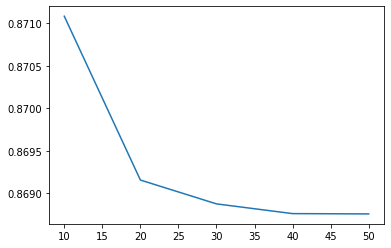

In [ ]:
plt.plot(np.array(k_values), np.array(rmse_errors), label="RMSE")
plt.show

###### Mean Absolute Error Values - Increases with increase in maximum number of neighbours

<function matplotlib.pyplot.show>

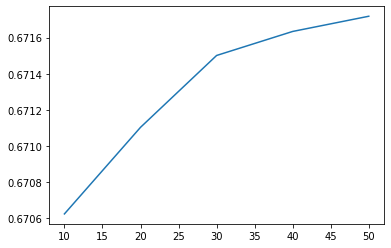

In [ ]:
plt.plot(np.array(k_values), np.array(mae_errors), label="MAE")
plt.show

##### `min_k` values

In [ ]:
from surprise.prediction_algorithms.knns import KNNBasic
import numpy as np
import matplotlib.pyplot as plt

min_k_values = [2, 4, 6, 8, 10]
rmse_errors = []
mae_errors = []

for min_k in min_k_values:
  temp_algo = KNNBasic(k=30, min_k=min_k, sim_options={"name":"cosine"}, verbose=True)
  temp_algo.fit(trainset)
  temp_pred = temp_algo.test(testset)
  rmse_errors.append(accuracy.rmse(temp_pred))
  mae_errors.append(accuracy.mae(temp_pred))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8931
MAE:  0.6731
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8727
MAE:  0.6706
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8668
MAE:  0.6722
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8647
MAE:  0.6741
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8638
MAE:  0.6759


###### Root Mean Square Error Values - Decreases with increase in minimum number of neighbours

<function matplotlib.pyplot.show>

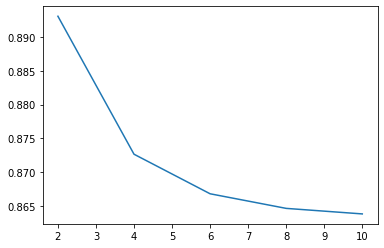

In [ ]:
plt.plot(np.array(min_k_values), np.array(rmse_errors), label="RMSE")
plt.show

###### Mean Absolute Error Values - Increases with increase in minimum number of neighbours

<function matplotlib.pyplot.show>

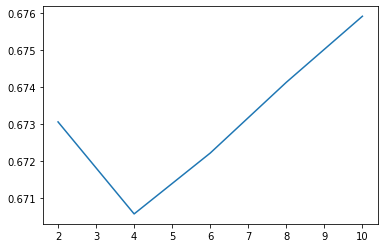

In [ ]:
plt.plot(np.array(min_k_values), np.array(mae_errors), label="MAE")
plt.show

### KNN With Means
- https://surprise.readthedocs.io/en/stable/knn_inspired.html
- Basic collaborative filtering algorithm, taking into account the mean ratings of each user
- `k` - maximum number of neighbours yo be taken into account
- `min_k` - minimum number of neighbours yo be taken into account
- `sim_options` - a dictionary of options for the similarity measure
- `verbose` - whether to print trace maessages of bias estimation, similarity etc

In [ ]:
from surprise.prediction_algorithms.knns import KNNWithMeans

algorithm2 = KNNWithMeans(k=20, min_k=5, sim_options={"name":"cosine"}, verbose=True)
algorithm2.fit(trainset)
predictions2 = algorithm2.test(testset)
accuracy.rmse(predictions2)
accuracy.mae(predictions2)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8475
MAE:  0.6002


0.6002265636795177

#### **Tuning Parameters of KNNWithMeans**

##### `k` values

In [ ]:
from surprise.prediction_algorithms.knns import KNNWithMeans
import numpy as np
import matplotlib.pyplot as plt

k_values = [10, 20, 30, 40, 50]
rmse_errors = []
mae_errors = []

for k in k_values:
  temp_algo = KNNWithMeans(k=k, min_k=5, sim_options={"name":"cosine"}, verbose=True)
  temp_algo.fit(trainset)
  temp_pred = temp_algo.test(testset)
  rmse_errors.append(accuracy.rmse(temp_pred))
  mae_errors.append(accuracy.mae(temp_pred))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8567
MAE:  0.6066
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8551
MAE:  0.6057
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8549
MAE:  0.6055
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8549
MAE:  0.6054
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8548
MAE:  0.6053


###### Root Mean Square Error Values - Decreases with increase in maximum number of neighbours

<function matplotlib.pyplot.show>

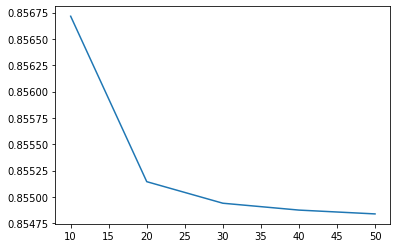

In [ ]:
plt.plot(np.array(k_values), np.array(rmse_errors), label="RMSE")
plt.show

###### Mean Absolute Error Values - Increases with increase in maximum number of neighbours

<function matplotlib.pyplot.show>

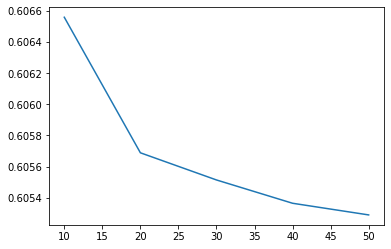

In [ ]:
plt.plot(np.array(k_values), np.array(mae_errors), label="MAE")
plt.show

##### `min_k` values

In [ ]:
from surprise.prediction_algorithms.knns import KNNWithMeans
import numpy as np
import matplotlib.pyplot as plt

min_k_values = [2, 4, 6, 8, 10]
rmse_errors = []
mae_errors = []

for min_k in min_k_values:
  temp_algo = KNNWithMeans(k=30, min_k=min_k, sim_options={"name":"cosine"}, verbose=True)
  temp_algo.fit(trainset)
  temp_pred = temp_algo.test(testset)
  rmse_errors.append(accuracy.rmse(temp_pred))
  mae_errors.append(accuracy.mae(temp_pred))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8714
MAE:  0.6119
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8576
MAE:  0.6060
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8534
MAE:  0.6054
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8521
MAE:  0.6063
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8519
MAE:  0.6073


###### Root Mean Square Error Values - Decreases with increase in minimum number of neighbours

<function matplotlib.pyplot.show>

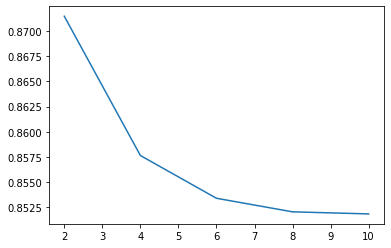

In [ ]:
plt.plot(np.array(min_k_values), np.array(rmse_errors), label="RMSE")
plt.show

###### Mean Absolute Error Values - Increases with increase in minimum number of neighbours

<function matplotlib.pyplot.show>

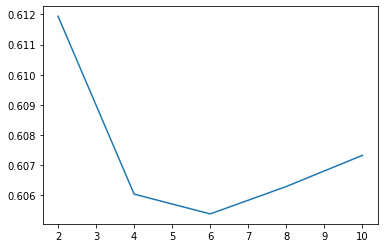

In [ ]:
plt.plot(np.array(min_k_values), np.array(mae_errors), label="MAE")
plt.show

## **Dimensionality Reduction**
- Lectures [[46 - 50]](https://www.youtube.com/watch?v=yLdOS6xyM_Q&list=PLLssT5z_DsK9JDLcT8T62VtzwyW9LNepV&index=46) 

## **Prediction Algorithms - Matrix Factorization**
- https://albertauyeung.github.io/2017/04/23/python-matrix-factorization.html
- https://surprise.readthedocs.io/en/stable/matrix_factorization.html

### SVD
- https://surprise.readthedocs.io/en/stable/matrix_factorization.html
- Matrix Factorization-Based Algorithm
- `n_factors` - The number of factors
- `n_epochs` - The number of iteration of the SGD procedure
- `lr_all` - The learning rate for all parameters
- `reg_all` - The regularization term for all parameters

In [ ]:
from surprise.prediction_algorithms.matrix_factorization import SVD

algorithm3 = SVD()
algorithm3.fit(trainset)
predictions3 = algorithm3.test(testset)
accuracy.rmse(predictions3)
accuracy.mae(predictions3)

RMSE: 0.8199
MAE:  0.6006


0.6006405864572494

#### **Tuning Parameters of SVD**

##### `n_factors` values

RMSE: 0.8243
RMSE: 0.8244
RMSE: 0.8241
RMSE: 0.8253
RMSE: 0.8260
RMSE: 0.8251
RMSE: 0.8282


<function matplotlib.pyplot.show>

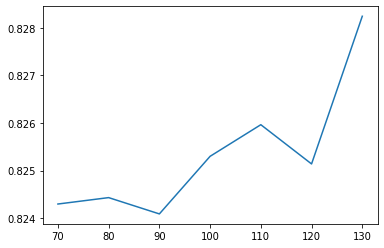

In [ ]:
from surprise.prediction_algorithms.matrix_factorization import SVD
import numpy as np
import matplotlib.pyplot as plt

n_factors_values = [70, 80, 90, 100, 110, 120, 130]
rmse_errors = []

for n_factors in n_factors_values:
  temp_algo = SVD(n_factors=n_factors)
  temp_algo.fit(trainset)
  temp_pred = temp_algo.test(testset)
  rmse_errors.append(accuracy.rmse(temp_pred))
plt.plot(np.array(n_factors_values), np.array(rmse_errors))
plt.show

##### `n_epochs` values

RMSE: 0.8234
RMSE: 0.8251
RMSE: 0.8262
RMSE: 0.8257
RMSE: 0.8270


<function matplotlib.pyplot.show>

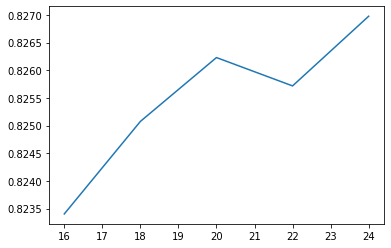

In [ ]:
from surprise.prediction_algorithms.matrix_factorization import SVD
import numpy as np
import matplotlib.pyplot as plt

n_epochs_values = [16, 18, 20, 22, 24]
rmse_errors = []

for n_epochs in n_epochs_values:
  temp_algo = SVD(n_epochs=n_epochs)
  temp_algo.fit(trainset)
  temp_pred = temp_algo.test(testset)
  rmse_errors.append(accuracy.rmse(temp_pred))
plt.plot(np.array(n_epochs_values), np.array(rmse_errors))
plt.show

##### `lr_all` values

RMSE: 0.8240
RMSE: 0.8279
RMSE: 0.8274
RMSE: 0.8305
RMSE: 0.8320


<function matplotlib.pyplot.show>

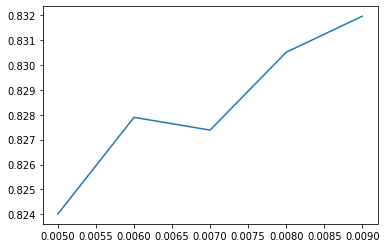

In [ ]:
from surprise.prediction_algorithms.matrix_factorization import SVD
import numpy as np
import matplotlib.pyplot as plt

lr_all_values = [0.005, 0.006, 0.007, 0.008, 0.009]
rmse_errors = []

for lr_all in lr_all_values:
  temp_algo = SVD(lr_all=lr_all)
  temp_algo.fit(trainset)
  temp_pred = temp_algo.test(testset)
  rmse_errors.append(accuracy.rmse(temp_pred))
plt.plot(np.array(lr_all_values), np.array(rmse_errors))
plt.show

##### `reg_all` values

RMSE: 0.8267
RMSE: 0.8253
RMSE: 0.8235
RMSE: 0.8231
RMSE: 0.8233


<function matplotlib.pyplot.show>

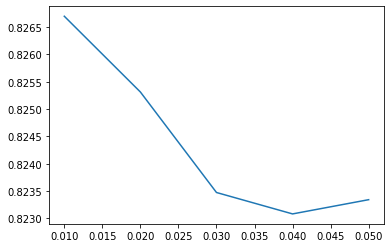

In [ ]:
from surprise.prediction_algorithms.matrix_factorization import SVD
import numpy as np
import matplotlib.pyplot as plt

reg_all_values = [0.01, 0.02, 0.03, 0.04, 0.05]
rmse_errors = []

for reg_all in reg_all_values:
  temp_algo = SVD(reg_all=reg_all)
  temp_algo.fit(trainset)
  temp_pred = temp_algo.test(testset)
  rmse_errors.append(accuracy.rmse(temp_pred))
plt.plot(np.array(reg_all_values), np.array(rmse_errors))
plt.show

### SVDpp
- https://surprise.readthedocs.io/en/stable/matrix_factorization.html
- Matrix Factorization-Based Algorithm, taking into account the implicit ratings
- `n_factors` - The number of factors
- `n_epochs` - The number of iteration of the SGD procedure
- `lr_all` - The learning rate for all parameters
- `reg_all` - The regularization term for all parameters

In [ ]:
from surprise.prediction_algorithms.matrix_factorization import SVDpp

algorithm4 = SVDpp()
algorithm4.fit(trainset)
predictions4 = algorithm4.test(testset)
accuracy.rmse(predictions4)
accuracy.mae(predictions4)

RMSE: 0.8132
MAE:  0.5931


0.5930601223565333

#### **Tuning Parameters of SVDpp**

##### `n_factors` values

In [ ]:
from surprise.prediction_algorithms.matrix_factorization import SVDpp
import numpy as np
import matplotlib.pyplot as plt

n_factors_values = [90, 100, 110]
rmse_errors = []

for n_factors in n_factors_values:
  temp_algo = SVDpp(n_factors=n_factors)
  temp_algo.fit(trainset)
  temp_pred = temp_algo.test(testset)
  rmse_errors.append(accuracy.rmse(temp_pred))
plt.plot(np.array(n_factors_values), np.array(rmse_errors))
plt.show

RMSE: 0.8313
RMSE: 0.8327


##### `n_epochs` values

In [ ]:
from surprise.prediction_algorithms.matrix_factorization import SVDpp
import numpy as np
import matplotlib.pyplot as plt

n_epochs_values = [18, 20, 22]
rmse_errors = []

for n_epochs in n_epochs_values:
  temp_algo = SVDpp(n_epochs=n_epochs)
  temp_algo.fit(trainset)
  temp_pred = temp_algo.test(testset)
  rmse_errors.append(accuracy.rmse(temp_pred))
plt.plot(np.array(n_epochs_values), np.array(rmse_errors))
plt.show

##### `lr_all` values

In [ ]:
from surprise.prediction_algorithms.matrix_factorization import SVDpp
import numpy as np
import matplotlib.pyplot as plt

lr_all_values = [0.005, 0.007, 0.009]
rmse_errors = []

for lr_all in lr_all_values:
  temp_algo = SVDpp(lr_all=lr_all)
  temp_algo.fit(trainset)
  temp_pred = temp_algo.test(testset)
  rmse_errors.append(accuracy.rmse(temp_pred))
plt.plot(np.array(lr_all_values), np.array(rmse_errors))
plt.show

##### `reg_all` values

In [ ]:
from surprise.prediction_algorithms.matrix_factorization import SVDpp
import numpy as np
import matplotlib.pyplot as plt

reg_all_values = [0.01, 0.02, 0.03]
rmse_errors = []

for reg_all in reg_all_values:
  temp_algo = SVDpp(reg_all=reg_all)
  temp_algo.fit(trainset)
  temp_pred = temp_algo.test(testset)
  rmse_errors.append(accuracy.rmse(temp_pred))
plt.plot(np.array(reg_all_values), np.array(rmse_errors))
plt.show

### NMF
- https://surprise.readthedocs.io/en/stable/matrix_factorization.html
- Matrix Factorization-Based Algorithm and Collaborative Filtering
- `n_factors` - The number of factors
- `n_epochs` - The number of iteration of the SGD procedure
- `lr_all` - The learning rate for all parameters
- `reg_all` - The regularization term for all parameters

In [ ]:
from surprise.prediction_algorithms.matrix_factorization import NMF

algorithm5 = NMF()
algorithm5.fit(trainset)
predictions5 = algorithm5.test(testset)
accuracy.rmse(predictions5)
accuracy.mae(predictions5)

RMSE: 1.0011
MAE:  0.7697


0.7697061465305305

#### **Tuning Parameters of NMF**

##### `n_factors` values

RMSE: 0.9590
RMSE: 0.9640
RMSE: 0.9692
RMSE: 0.9711
RMSE: 0.9726
RMSE: 0.9759
RMSE: 0.9770


<function matplotlib.pyplot.show>

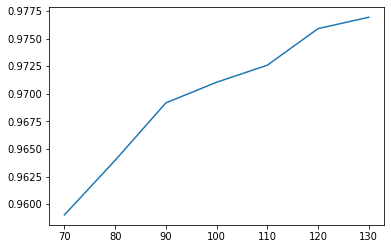

In [ ]:
from surprise.prediction_algorithms.matrix_factorization import NMF
import numpy as np
import matplotlib.pyplot as plt

n_factors_values = [80, 90, 100, 110, 120]
rmse_errors = []

for n_factors in n_factors_values:
  temp_algo = NMF(n_factors=n_factors)
  temp_algo.fit(trainset)
  temp_pred = temp_algo.test(testset)
  rmse_errors.append(accuracy.rmse(temp_pred))
plt.plot(np.array(n_factors_values), np.array(rmse_errors))
plt.show

##### `n_epochs` values

RMSE: 1.0504
RMSE: 1.0444
RMSE: 1.0253
RMSE: 1.0249
RMSE: 1.0327


<function matplotlib.pyplot.show>

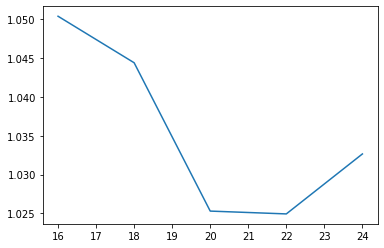

In [ ]:
from surprise.prediction_algorithms.matrix_factorization import NMF
import numpy as np
import matplotlib.pyplot as plt

n_epochs_values = [16, 18, 20, 22, 24]
rmse_errors = []

for n_epochs in n_epochs_values:
  temp_algo = NMF(n_epochs=n_epochs)
  temp_algo.fit(trainset)
  temp_pred = temp_algo.test(testset)
  rmse_errors.append(accuracy.rmse(temp_pred))
plt.plot(np.array(n_epochs_values), np.array(rmse_errors))
plt.show

##### `lr_all` values

RMSE: 1.0068
RMSE: 1.0059
RMSE: 1.0115
RMSE: 1.0101
RMSE: 1.0097


<function matplotlib.pyplot.show>

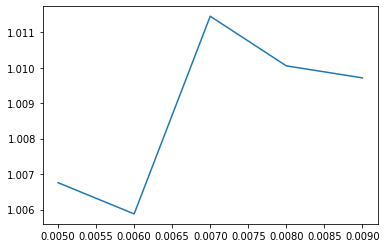

In [ ]:
from surprise.prediction_algorithms.matrix_factorization import NMF
import numpy as np
import matplotlib.pyplot as plt

lr_all_values = [0.005, 0.006, 0.007, 0.008, 0.009]
rmse_errors = []

for lr_all in lr_all_values:
  temp_algo = NMF(lr_bi=lr_all, lr_bu=lr_all)
  temp_algo.fit(trainset)
  temp_pred = temp_algo.test(testset)
  rmse_errors.append(accuracy.rmse(temp_pred))
plt.plot(np.array(lr_all_values), np.array(rmse_errors))
plt.show

##### `reg_all` values

RMSE: 1.1017
RMSE: 1.0678
RMSE: 1.0439
RMSE: 1.0310
RMSE: 1.0226


<function matplotlib.pyplot.show>

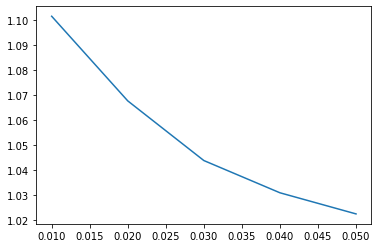

In [ ]:
from surprise.prediction_algorithms.matrix_factorization import NMF
import numpy as np
import matplotlib.pyplot as plt

reg_all_values = [0.01, 0.02, 0.03, 0.04, 0.05]
rmse_errors = []

for reg_all in reg_all_values:
  temp_algo = NMF(reg_bu=reg_all, reg_bi=reg_all, reg_pu=reg_all, reg_qi=reg_all)
  temp_algo.fit(trainset)
  temp_pred = temp_algo.test(testset)
  rmse_errors.append(accuracy.rmse(temp_pred))
plt.plot(np.array(reg_all_values), np.array(rmse_errors))
plt.show

## Getting Top N Predictions
- https://github.com/NicolasHug/Surprise/blob/master/examples/top_n_recommendations.py

##### Function to Convert Recipe ID to Recipe Name

In [ ]:
def recipe_ID_to_Name():

  recipe_df = pd.read_csv('/content/drive/MyDrive/ML/Kaggle_Dataset/core-data_recipe.csv')
  recipe_id_name = dict()

  for index, row in recipe_df.iterrows():
    recipe_id = int(row['recipe_id'])
    recipe_name = row['recipe_name']
    recipe_id_name[recipe_id] = recipe_name 
    
  return recipe_id_name 

In [ ]:
recipe_id_name = recipe_ID_to_Name()

##### Making Predictions (SVD)

In [ ]:
from surprise import SVD

algo = SVD()
algo.fit(trainset)
predictions = algo.test(testset)

##### Getting Top N Predictions

In [ ]:
from collections import defaultdict

def get_top_n_predictions(predictions, top_n):
  top_n_predictions = defaultdict(list)

  for uid, iid, true_r, est, _ in predictions:
    top_n_predictions[uid].append((iid, est))
  
  for uid, user_ratings in top_n_predictions.items():
    user_ratings.sort(key = lambda x:x[1], reverse = True)
    top_n_predictions[uid] = user_ratings[:top_n]
  
  return top_n_predictions

In [ ]:
top_n_predictions = get_top_n_predictions(predictions=predictions, top_n=3)

##### Printing Top N Predictions

In [ ]:
def print_top_n_predictions(top_n_predictions, n_users):
  count = 0

  for uid, user_ratings in top_n_predictions.items():
    print(uid, ",", [recipe_id_name[iid] for iid, est in user_ratings])

    count += 1
    if count == n_users:
      break

In [ ]:
print_top_n_predictions(top_n_predictions, 10)

1770296 , ['Cajun Chicken Pasta', 'Aussie Chicken', 'Sunrise Salad']
1032812 , ['Best Big, Fat, Chewy Chocolate Chip Cookie', 'Roast Sticky Chicken-Rotisserie Style', 'Broiled Tilapia Parmesan']
3571626 , ['Sloppy Joes II', 'Vera Cruz Tomatoes', 'Zucchini Patties']
557341 , ["Chantal's New York Cheesecake", 'Roasted New Potato Salad With Olives', 'Lemon Poppy Seed Bundt Cake']
425681 , ['Spiced Pumpkin Seeds', "Brooke's Best Bombshell Brownies", 'Pecan Praline Cookies']
1792605 , ['Hearty Breakfast Cookies', 'All Day Macaroni and Cheese']
1685787 , ['Picante Chicken', "Aunt Teen's Creamy Chocolate Fudge", 'Condiment Chops']
71634 , ['Cranberry Sauce', "Alyson's Broccoli Salad", 'Slow Cooker Beef Stew IV']
1910838 , ['Pumpkin Bread IV', "Mrs. Sigg's Snickerdoodles", 'Slow Cooker Ham']
2248760 , ['Spicy Bean Salsa', 'Country Apple Dumplings', 'Greek Baklava']


## Calculating FSA Scores of Recipes
- https://en.wikipedia.org/wiki/Traffic_light_rating_system

##### Fetching Nutritions in All Recipes

In [ ]:
import ast # To convert Stringed Dictionary in CSV to Python Dicitionary

def recipe_id_to_Nutritions():
  
  recipe_df = pd.read_csv('/content/drive/MyDrive/ML/Kaggle_Dataset/core-data_recipe.csv')
  recipe_id_nutritions = dict()

  for index, row in recipe_df.iterrows():
    recipe_id = int(row['recipe_id'])
    recipe_nutritions = ast.literal_eval(row['nutritions'])
    recipe_id_nutritions[recipe_id] = recipe_nutritions
  
  return recipe_id_nutritions

In [ ]:
recipe_id_nutritions = recipe_id_to_Nutritions()

##### Calculate FSA Score of Nutrient

In [ ]:
nutrient_limits = {'fat' : (3, 17.5), 'saturatedFat' : (1.5, 5), 'sugars' : (5, 22.5)}

In [ ]:
def calculate_nutrient_fsa(recipe_id, nutrient):

  if recipe_id_nutritions[recipe_id][nutrient]['amount'] <= nutrient_limits[nutrient][0]:
    return 1
  elif recipe_id_nutritions[recipe_id][nutrient]['amount'] <= nutrient_limits[nutrient][1]:
    return 2
  else:
    return 3

##### Calculate FSA Score of Recipe

In [ ]:
def calculate_recipe_fsa(recipe_id):

  fsa_score = calculate_nutrient_fsa(recipe_id, 'fat')
  fsa_score += calculate_nutrient_fsa(recipe_id, 'saturatedFat')
  fsa_score += calculate_nutrient_fsa(recipe_id, 'sugars')

  return fsa_score

##### Calculate FSA Scores for All Recipes

In [ ]:
recipe_fsa = dict()

In [ ]:
for recipe_id in recipe_id_name:
  
  recipe_fsa[recipe_id] = calculate_recipe_fsa(recipe_id)

##### Print FSA Scores

In [ ]:
count = 0

for recipe_id in recipe_fsa:
  print(recipe_id_name[recipe_id], ":", recipe_fsa[recipe_id])

  count += 1
  if count == 10:
    break

Pork Loin, Apples, and Sauerkraut : 6
Foolproof Rosemary Chicken Wings : 7
Chicken Pesto Paninis : 7
Potato Bacon Pizza : 5
Latin-Inspired Spicy Cream Chicken Stew : 6
Reuben Sandwich I : 7
Turkey Black Bean Burgers : 5
Cranberry Pork Chops II : 7
Schnitzel Sandwich : 8
Pam's Bierocks : 6


## Natural Language Processing - Text Processing
- https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk

##### NLTK Setup

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

##### Retaining Nouns from Ingredients

In [ ]:
def recipe_id_to_ingredients():

  recipe_df = pd.read_csv('/content/drive/MyDrive/ML/Kaggle_Dataset/core-data_recipe.csv')
  recipe_id_ingredients = dict()

  lemm = WordNetLemmatizer()

  for index, row in recipe_df.iterrows():
    recipe_id = int(row['recipe_id'])
    ingredient_list = row['ingredients'].split('^')

    processed_ingredients = []

    for ingredient in ingredient_list:
      tokenized_words = word_tokenize(ingredient)
      
      lemmatized_words = []

      for word in tokenized_words:
        lemmatized_words.append(lemm.lemmatize(word))

      ingredient_words = []
      pos_tagged = nltk.pos_tag(lemmatized_words)

      for word, tag in pos_tagged:
        if tag not in ('NN', 'NNP', 'NNS', 'NNPS') or word in ('water', 'degrees', 'F', 'C', '%', 'Addition', 'Additions', '-less-sodium', '-', '*', 'Additional', 'degree', 'Rub'):
          continue
        elif tag in ('NNS', 'NNPS'):
          ingredient_words.append(word[:-1])
        else:
          ingredient_words.append(word)
      
      temp_ingredient = " ".join(ingredient_words)
      if temp_ingredient != "":
        processed_ingredients.append(temp_ingredient)

    if len(processed_ingredients) > 0:
      recipe_id_ingredients[recipe_id] = list(sorted(set(processed_ingredients)))

  return recipe_id_ingredients

In [ ]:
recipe_id_ingredients = recipe_id_to_ingredients()

##### Printing the Ingredients

In [ ]:
count = 0

for recipe_id in recipe_id_ingredients:
  print(recipe_id_name[recipe_id], ":", recipe_id_ingredients[recipe_id])

  count += 1
  if count == 10:
    break

Pork Loin, Apples, and Sauerkraut : ['Granny Smith apple', 'apple cider', 'boneless pork loin roast', 'brown sugar', 'caraway seed', 'ground pepper', 'onion', 'powder', 'salt', 'sauerkraut']
Foolproof Rosemary Chicken Wings : ['chicken wing', 'head garlic', 'oil', 'pepper', 'salt', 'sprig rosemary']
Chicken Pesto Paninis : ['Monterey Jack cheese', 'basil pesto', 'bell pepper', 'bread', 'chicken', 'onion']
Potato Bacon Pizza : ['Crust', 'Parmesan cheese', 'Sauce', 'butter', 'flour', 'honey', 'mozzarella cheese', 'oil', 'potato', 'strip bacon', 'whipping cream', 'yeast']
Latin-Inspired Spicy Cream Chicken Stew : ['bean', 'cilantro', 'cream cheese', 'ground cumin', 'ground pepper', 'kerne corn', 'salsa', 'skinless boneless breast half', 'taco', 'tomato']
Reuben Sandwich I : ['beef', 'butter', 'mozzarella cheese', 'rye bread', 'sauerkraut']
Turkey Black Bean Burgers : ['bean', 'egg', 'garlic', 'ground cumin', 'ground turkey', 'onion', 'oregano', 'parsley', 'sea salt ground pepper', 'tomato

##### Collecting Total Ingredient Set

In [ ]:
total_ingredients_list = []
for ingredients in recipe_id_ingredients.values():
  for ingredient in ingredients:
    total_ingredients_list.append(ingredient)

In [ ]:
total_ingredients_set = list(sorted(set(total_ingredients_list)))
print(len(total_ingredients_set))

14805


## Calculating PMI Using Bipartite Graph
- https://networkx.org/documentation/stable/tutorial.html

##### Creating Edges

In [ ]:
edges = []

for recipe_id in recipe_id_ingredients:
  for ingredient in recipe_id_ingredients[recipe_id]:
    edges.append((recipe_id, ingredient))

Creating a Bipartite Graph

In [ ]:
import networkx as nx
from networkx.algorithms import bipartite

In [ ]:
recipe_df = pd.read_csv('/content/drive/MyDrive/ML/Kaggle_Dataset/core-data_recipe.csv')
B = nx.Graph()
B.add_nodes_from(list(recipe_df['recipe_id']), bipartite = 0)
B.add_nodes_from(total_ingredients_set, bipartite = 1)
B.add_edges_from(edges)

In [ ]:
G = bipartite.weighted_projected_graph(B, total_ingredients_set)

In [ ]:
adjacency_matrix = G.adj

##### Calcuating PMI Score of an Ingredient

In [ ]:
def calculate_pmi_ingredient(ingredient):
  s = 0
  
  for key in adjacency_matrix[ingredient]:
    s += adjacency_matrix[ingredient][key]['weight']

  return s

In [ ]:
ingredient_pmi = dict()

In [ ]:
for ingredient in total_ingredients_set:
  ingredient_pmi[ingredient] = calculate_pmi_ingredient(ingredient)

##### Calculating PMI Value for Pair of Ingredients

In [ ]:
from math import log

def calculate_pmi_pair(a, b):
  try:
    pab = adjacency_matrix[a][b]['weight']
  except:
    return 0

  pa = ingredient_pmi[a]
  pb = ingredient_pmi[b]

  return log((pab * len(list(recipe_df['recipe_id']))) / (pa * pb))

Calculating PMI Score of a Recipe

In [ ]:
def calculate_pmi_recipe(recipe_id):
  ingredients = recipe_id_ingredients[recipe_id]

  if len(ingredients) < 2:
    return 0

  max_pmi_score = 0

  for i in range(len(ingredients)):
    for j in range(i+1, len(ingredients)):
      pmi = calculate_pmi_pair(ingredients[i], ingredients[j])

      if pmi > max_pmi_score:
        max_pmi_score = pmi
  
  return max_pmi_score

##### Calculating PMI Scores of All Recipes

In [ ]:
recipe_id_pmi = dict()

In [ ]:
for recipe_id in recipe_id_ingredients:
  recipe_id_pmi[recipe_id] = calculate_pmi_recipe(recipe_id)

##### Normalizing PMI Scores

In [ ]:
def normalise_pmi_scores(recipe_id_pmi, upper_bound = 5):
  pmi_values = list(recipe_id_pmi.values())
  
  mn = min(pmi_values)
  mx = max(pmi_values)

  for recipe_id in recipe_id_pmi:
    recipe_id_pmi[recipe_id] = ((recipe_id_pmi[recipe_id] - mn)/(mx - mn)) * upper_bound
  return recipe_id_pmi

In [ ]:
recipe_id_pmi = normalise_pmi_scores(recipe_id_pmi)

##### Printing PMI Scores of Recipes

In [ ]:
count = 0

for recipe_id in recipe_id_pmi:
  print(recipe_id_name[recipe_id], ':', recipe_id_pmi[recipe_id])

  count += 1
  if count == 10:
    break

## Creating Dataset of Recipes via Web Scrapping

### Scrapping from https://www.indianhealthyrecipes.com/recipes/

#### Set of Web Scrapping

In [ ]:
!pip install html5lib
!pip install requests
!pip install bs4

#### Web Scrapping Recipe Links - https://www.indianhealthyrecipes.com/recipes/

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
url = "https://www.indianhealthyrecipes.com/recipes/"
contents = requests.get(url).content

soup = BeautifulSoup(contents, 'html5lib')
tags = soup('a')

links = []
for tag in tags:
  links.append(tag.get('href', None))

In [ ]:
new_links = []

for link in links:
  if link != None and link.startswith('https://'):
    new_links.append(link)

links = new_links

In [ ]:
links = links[:1072]
links = links[55:]

In [ ]:
count = 0

for link in links:
  print(link)

  count += 1
  if count == 20:
    break

https://www.indianhealthyrecipes.com/achari-chicken/
https://www.indianhealthyrecipes.com/achari-paneer-masala-recipe/
https://www.indianhealthyrecipes.com/adai-recipe-adai-dosa/
https://www.indianhealthyrecipes.com/aglio-olio/
https://www.indianhealthyrecipes.com/ajwain-paratha-recipe/
https://www.indianhealthyrecipes.com/akki-roti-recipe-akki-rotti/
https://www.indianhealthyrecipes.com/alasanda-vada-recipe-lobia-vada-baked-and-fried-recipes/
https://www.indianhealthyrecipes.com/alasandalu-kura-bobbarlu-curry-recipe/
https://www.indianhealthyrecipes.com/allam-pachadi/
https://www.indianhealthyrecipes.com/almond-burfi-using-coconut-palm-sugar-or-jaggery/
https://www.indianhealthyrecipes.com/carrot-smoothie/
https://www.indianhealthyrecipes.com/homemade-almond-badam-milk-powder/
https://www.indianhealthyrecipes.com/almond-yogurt-recipe/
https://www.indianhealthyrecipes.com/aloo-baingan-masala-recipe/
https://www.indianhealthyrecipes.com/aloo-bhujia/
https://www.indianhealthyrecipes.com/

#### Retrieving Informations of a Single Recipe from a Single Link

##### Retrieving Name of a Single Recipe

In [ ]:
def get_recipe_name(link):
  temp_url = link
  temp_contents = requests.get(temp_url).content

  bs = BeautifulSoup(temp_contents, 'html5lib')
  try:
    h1 = bs('h1')
    recipe_name = h1[0].text

    return recipe_name
  
  except:
    return -1


In [ ]:
get_recipe_name(links[0])

'Achari chicken'

##### Retrieving Image URL of a Single Recipe

In [ ]:
def get_recipe_image(link):
  temp_url = link
  temp_contents = requests.get(temp_url).content

  bs = BeautifulSoup(temp_contents, 'html5lib')
  try:
    img = bs('img')
    
    for i in img:
      if i.parent.parent.get('class', None)[0] == 'wp-block-image':
        return i.get('src', -1)
    
    return -1

  except:
    return -1

In [ ]:
get_recipe_image(links[0])

'https://www.indianhealthyrecipes.com/wp-content/uploads/2020/01/achari-chicken.jpg'

##### Retrieving nutritions of a Single Recipe

In [ ]:
def get_recipe_nutritions(link):
  temp_url = link
  temp_contents = requests.get(temp_url).content

  bs = BeautifulSoup(temp_contents, 'html5lib')
  try:
    nutritions = bs.find('div', class_ = 'wprm-nutrition-label')
    nutritional_items = nutritions.find_all('div', class_ = 'nutrition-item')

    nutrients_list = dict()

    for item in nutritional_items:
      try:
        main = item.find('span', class_ = 'nutrition-main')
        nutrient_name = main.find('strong').text
        quantity = main.text.replace(nutrient_name, "").strip()
      
      except:
        continue

      count = 0
      for letter in quantity:
        if ord(letter) not in range(48, 58) and letter != '.':
          break
        count += 1
      
      nutrient_details = dict()
      nutrient_details['amount'] = quantity[:count]
      if count == len(quantity):
        nutrient_details['unit'] = None
      else:
        nutrient_details['unit'] = quantity[count:]

      nutrients_list[nutrient_name] = nutrient_details

    return nutrients_list

  except Exception as e:
    return -1

In [ ]:
get_recipe_nutritions(links[5])

{'Calcium': {'amount': '20', 'unit': 'mg'},
 'Calories': {'amount': '218', 'unit': None},
 'Carbohydrates': {'amount': '38', 'unit': 'g'},
 'Fat': {'amount': '5', 'unit': 'g'},
 'Iron': {'amount': '1', 'unit': 'mg'},
 'Potassium': {'amount': '143', 'unit': 'mg'},
 'Protein': {'amount': '4', 'unit': 'g'},
 'Sodium': {'amount': '273', 'unit': 'mg'},
 'Vitamin A': {'amount': '80', 'unit': 'IU'},
 'Vitamin C': {'amount': '9.7', 'unit': 'mg'}}

##### Retrieving Ingredients of a Single Recipe

In [ ]:
def get_recipe_ingredients(link):
  temp_url = link
  temp_contents = requests.get(temp_url).content

  bs = BeautifulSoup(temp_contents, 'html5lib')
  try:
    ingredients_list_container = bs.find('div', class_ = 'wprm-recipe-ingredients-container')
    ingredients_groups = ingredients_list_container.find_all('div', class_ = 'wprm-recipe-ingredient-group')

    ingredients_list = []

    for group in ingredients_groups:
      
      try:
        items = group.find_all('li')

        for item in items:
          spans = item.find_all('span')[2:]
          if item.find('span', class_ = 'wprm-recipe-ingredient-notes') != None:
            spans.remove(item.find('span', class_ = 'wprm-recipe-ingredient-notes'))
          
          ingredient = " ".join([i.text for i in spans])
          ingredients_list.append(ingredient)

      except:
        continue

    return ingredients_list
  
  except:
    return -1

In [ ]:
get_recipe_ingredients(links[0])

['4 dried red chilies',
 '2 tablespoons coriander seeds',
 '¼ tablespoon mustard seeds',
 '1 tablespoon cumin seeds',
 '2 Pinches fenugreek seeds',
 '1½ tablespoons fennel seeds ',
 '1 cup onions',
 '¾ cup tomatoes ',
 '2 tablespoons oil',
 '½ to ¾ tsp kalonji ',
 '1 pinch mustard',
 '1/8 teaspoon asafoetida',
 '1 tablespoon ginger garlic paste',
 '¼ teaspoon turmeric',
 '1½ teaspoon chilli powder',
 '1½ teaspoon sugar',
 '1 teaspoon salt',
 '½ cup curd',
 '½ cup hot water',
 '½ kg chicken',
 '1 tablespoon pickle',
 '2 tablespoons coriander leaves',
 '1 teaspoon shredded ginger ']

##### Retrieving Instructions of a Single Recipe

In [ ]:
def get_recipe_instructions(link):
  temp_url = link
  temp_contents = requests.get(temp_url).content

  bs = BeautifulSoup(temp_contents, 'html5lib')
  try:
    recipe_instructions = []

    instructions_groups = bs.find_all('div', class_ = 'wprm-recipe-instruction-group')
    for group in instructions_groups:
      items = group.find_all('li')

      for item in items:
        instruction = item.find('div', class_ = 'wprm-recipe-instruction-text')
        recipe_instructions.append(instruction.text.strip())

    return recipe_instructions

  except:
    return -1

In [ ]:
get_recipe_instructions(links[0])

['Prepare the achari spice powder by adding red chilies, coriander seeds, cumin, mustard, fennel seeds and methi seeds to a spice jar.',
 'Make a fine powder set aside.',
 'Beat the yogurt well with a whisk until smooth.',
 'Heat oil in a pan. If using mustard oil, heat it until smoky hot.',
 'Add kalonji seeds & mustard.\xa0When they splutter add hing.',
 'Next add onions and saute until golden stirring often.',
 'Add ginger garlic paste and fry till the raw smell goes away.\xa0Reduce the flame and stir in the achari spice powder.',
 'Saute until a nice aroma comes out just for 1 to 2 mins. Avoid over frying as it can turn bitter.',
 'Pour the tomato puree and saute till the masala thickens.\xa0Then add red chili powder, turmeric, salt and sugar.',
 'Saute on a low heat for 2 to 3 mins until the masala leaves the pan.\xa0Take a tablespoon of this masala and mix it with the whisked yogurt.',
 'Ensure flame is very low at this stage and add half of the yogurt. Stir well to incorporate i

#### Retrieving Information of all Recipes from the Links Scrapped

In [ ]:
recipe_informations = []

In [ ]:
for link in links:
  recipe_name = get_recipe_name(link)
  recipe_image = get_recipe_image(link)
  recipe_nutritions = get_recipe_nutritions(link)
  recipe_ingredients = get_recipe_ingredients(link)
  recipe_instructions = get_recipe_instructions(link)

  if recipe_name == -1 or recipe_image == -1 or recipe_nutritions == -1 or recipe_ingredients == -1 or recipe_instructions == -1:
    continue

  recipe_info = []
  recipe_info.append(recipe_name)
  recipe_info.append(recipe_image)
  recipe_info.append("^".join(recipe_ingredients))
  recipe_info.append("^".join(recipe_instructions))
  recipe_info.append(recipe_nutritions)

  recipe_informations.append(recipe_info)

In [ ]:
count = 0

for recipe_info in recipe_informations:
  print(recipe_info)

  count += 1
  if count == 20:
    break

['Achari chicken', 'https://www.indianhealthyrecipes.com/wp-content/uploads/2020/01/achari-chicken.jpg', '4 dried red chilies^2 tablespoons coriander seeds^¼ tablespoon mustard seeds^1 tablespoon cumin seeds^2 Pinches fenugreek seeds^1½ tablespoons fennel seeds ^1 cup onions^¾ cup tomatoes ^2 tablespoons oil^½ to ¾ tsp kalonji ^1 pinch mustard^1/8 teaspoon asafoetida^1 tablespoon ginger garlic paste^¼ teaspoon turmeric^1½ teaspoon chilli powder^1½ teaspoon sugar^1 teaspoon salt^½ cup curd^½ cup hot water^½ kg chicken^1 tablespoon pickle^2 tablespoons coriander leaves^1 teaspoon shredded ginger ', 'Prepare the achari spice powder by adding red chilies, coriander seeds, cumin, mustard, fennel seeds and methi seeds to a spice jar.^Make a fine powder set aside.^Beat the yogurt well with a whisk until smooth.^Heat oil in a pan. If using mustard oil, heat it until smoky hot.^Add kalonji seeds & mustard.\xa0When they splutter add hing.^Next add onions and saute until golden stirring often.^Ad

In [ ]:
len(recipe_informations)

980

#### Converting Recipe Information into CSV

In [ ]:
columns = ['recipe_name', 'image_url', 'ingredients', 'cooking_directions', 'nutritions']

In [ ]:
df = pd.DataFrame(recipe_informations, columns = columns)

In [ ]:
df

,recipe_name,image_url,ingredients,cooking_directions,nutritions
0,Achari chicken,https://www.indianhealthyrecipes.com/wp-conten...,4 dried red chilies^2 tablespoons coriander se...,Prepare the achari spice powder by adding red ...,"{'Calories': {'amount': '431', 'unit': None}, ..."
1,Achari paneer recipe,https://www.indianhealthyrecipes.com/wp-conten...,1 tbsp coriander seeds^2 red chilies^1 tbsp fe...,"Add red chilies, coriander seeds, fennel seeds...","{'Calories': {'amount': '108', 'unit': None}, ..."
2,Adai Recipe | Adai Dosa,https://www.indianhealthyrecipes.com/wp-conten...,¾ cup rice ^¼ cup chana dal^¼ cup toor dal^2 t...,"Add all the lentils – chana, toor, urad and mo...","{'Calories': {'amount': '163', 'unit': None}, ..."
3,Aglio Olio Recipe,https://www.indianhealthyrecipes.com/wp-conten...,250 grams spaghetti^1 tbsp garlic^1 tsp red ch...,Bring ample amount of water to a rapid boil in...,"{'Calories': {'amount': '682', 'unit': None}, ..."
4,Ajwain paratha recipe | How to make carom seed...,https://www.indianhealthyrecipes.com/wp-conten...,2 cups whole wheat flour^2 tsps oil^salt^1 tsp...,"To a mixing bowl add flour, salt and oil. Add ...","{'Calories': {'amount': '113', 'unit': None}, ..."
...,...,...,...,...,...
975,White sauce pasta,https://www.indianhealthyrecipes.com/wp-conten...,1 cup pasta^1½ cup warm milk^1½ tablespoon all...,Bring 4 cups water to a boil in a large pot al...,"{'Calories': {'amount': '486', 'unit': None}, ..."
976,Yam fry recipe | Suran stir fry | kandagadda v...,https://www.indianhealthyrecipes.com/wp-conten...,1 cup yam^1 green chili^½ tsp ginger garlic pa...,Soak yam in water for about 15 minutes for the...,"{'Calories': {'amount': '97', 'unit': None}, '..."
977,Zarda recipe (Sweet rice recipe),https://www.indianhealthyrecipes.com/wp-conten...,1 cup basmati rice^5 cups water^yellow food ...,Wash rice at least thrice and soak in lots of ...,"{'Calories': {'amount': '478', 'unit': None}, ..."
978,Zucchini curry (Courgette curry),https://www.indianhealthyrecipes.com/wp-conten...,250 grams zucchini^1 cup onions^1 cup tomatoes...,"Rinse onions, tomatoes, chilies, ginger and fi...","{'Calories': {'amount': '147', 'unit': None}, ..."


In [ ]:
df.to_csv("/content/drive/MyDrive/Manual_Dataset/data_recipe_indianhealthyrecipes.csv")

## Creating Dataset of Recipes via Web Scrapping

### Scrapping from https://www.pcrm.org/good-nutrition/plant-based-diets/recipes

#### Web Scrapping Recipe Links - https://www.pcrm.org/good-nutrition/plant-based-diets/recipes

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
links = []

for i in range(26):
  url = "https://www.pcrm.org/good-nutrition/plant-based-diets/recipes?recipe_keys=&page="+str(i)
  contents = requests.get(url).content

  soup = BeautifulSoup(contents, 'html5lib')
  recipes_container = soup.find('div', class_ = 'views-element-container')
  recipe_rows = recipes_container.find_all('div', class_ = 'views-row')

  for row in recipe_rows:
    link = "https://www.pcrm.org" + row.find('a', class_ = 'f-teaser-title').get('href',None)

    if link != None:
      links.append(link)

In [ ]:
count = 0

for link in links:
  print(link)

  count += 1
  if count == 20:
    break

https://www.pcrm.org/good-nutrition/plant-based-diets/recipes/thai-crunch-salad-peanut-dressing
https://www.pcrm.org/good-nutrition/plant-based-diets/recipes/carrot-halwa
https://www.pcrm.org/good-nutrition/plant-based-diets/recipes/huevos-rancheros
https://www.pcrm.org/good-nutrition/plant-based-diets/recipes/ambrosia
https://www.pcrm.org/good-nutrition/plant-based-diets/recipes/autumn-stew
https://www.pcrm.org/good-nutrition/plant-based-diets/recipes/banana-ginger-pancakes
https://www.pcrm.org/good-nutrition/plant-based-diets/recipes/berry-overnight-oats
https://www.pcrm.org/good-nutrition/plant-based-diets/recipes/baked-oatmeal-cups
https://www.pcrm.org/good-nutrition/plant-based-diets/recipes/broccoli-burritos
https://www.pcrm.org/good-nutrition/plant-based-diets/recipes/lentil-cucumber-salad
https://www.pcrm.org/good-nutrition/plant-based-diets/recipes/ten-minute-mixed-veggie-stir-fry
https://www.pcrm.org/good-nutrition/plant-based-diets/recipes/chocolate-mousse
https://www.pcrm.o

In [ ]:
len(links)

242

#### Retrieving Informations of a Single Recipe from a Single Link

In [ ]:
print(links[0])

https://www.pcrm.org/good-nutrition/plant-based-diets/recipes/thai-crunch-salad-peanut-dressing


In [ ]:
temp_url = 'https://www.pcrm.org/good-nutrition/plant-based-diets/recipes/orange-you-bananas-kale-smoothie'
temp_contents = requests.get(temp_url).content

bs = BeautifulSoup(temp_contents, 'html5lib')

##### Retrieving Name of a Single Recipe

In [ ]:
def get_recipe_name_2(bs):
  try:
    recipe_name = bs.find('h1', class_ = 'h1 h1-- article-billboard__title').text.strip()

    return recipe_name

  except:
    return -1

In [ ]:
get_recipe_name_2(bs)

'Orange You Bananas for Kale Smoothie'

##### Retrieving Image URL of a Single Recipe

In [ ]:
def get_recipe_image_2(bs):
  try:
    recipe_image = "https://www.pcrm.org" + bs.find('img', class_ = 'figure__img figure__img-- u-mb2').get('src', None)

    return recipe_image

  except:
    return -1

In [ ]:
get_recipe_image_2(bs)

'https://www.pcrm.org/sites/default/files/2019-11/Orange-You-Bananas-for-Kale-Smoothie.jpg'

##### Retrieving Nutritions of a Single Recipe

In [ ]:
def get_recipe_nutritions_2(bs):
  try:
    a = bs.find('a', id = 'nutrition_facts')
    recipe_nutritions_container = a.find_next_sibling()
    recipe_nutrients_p = recipe_nutritions_container.find_all('p')[1]

    quantities = recipe_nutrients_p.text
    nutrients = quantities.split('\n')
    
    new_nutrients = []
    for nutrient in nutrients:
      new_nutrients.append(nutrient.strip())

    nutrients = new_nutrients

    recipe_nutrients = dict()

    for nutrient in nutrients:
      n = nutrient[:nutrient.find(':')]
      quantity = nutrient[nutrient.find(':') + 2:].split(" ")
      amount = quantity[0]
      try:
        unit = quantity[1]
      except:
        unit = None

      if amount[-1] == '%':
        amount = amount[:-1]
        unit = '%'

      nutrient_info = dict()
      nutrient_info['amount'] = amount
      nutrient_info['unit'] = unit

      recipe_nutrients[n] = nutrient_info
  
    return recipe_nutrients

  except:
    return -1

In [ ]:
get_recipe_nutritions_2(bs)

{'Beta-Carotene': {'amount': '2,464', 'unit': 'mcg'},
 'Calcium': {'amount': '99', 'unit': 'mg'},
 'Calories': {'amount': '110', 'unit': None},
 'Calories from Fat': {'amount': '8.5', 'unit': '%'},
 'Carbohydrates': {'amount': '24.5', 'unit': 'g'},
 'Cholesterol': {'amount': '0', 'unit': 'mg'},
 'Fat': {'amount': '1.1', 'unit': 'g'},
 'Fiber': {'amount': '3.8', 'unit': 'g'},
 'Iron': {'amount': '1', 'unit': 'mg'},
 'Protein': {'amount': '3.1', 'unit': 'g'},
 'Saturated Fat': {'amount': '0.2', 'unit': 'g'},
 'Sodium': {'amount': '36', 'unit': 'mg'},
 'Sugar': {'amount': '14.9', 'unit': 'g'},
 'Vitamin C': {'amount': '33.1', 'unit': 'mg'},
 'Vitamin E': {'amount': '1.2', 'unit': 'mg'}}

##### Retrieving Ingredients of a Single Recipe

In [ ]:
def get_recipe_ingredients_2(bs):
  try:
    a = bs.find('a', id = 'ingredients')

    recipe_ingredients = []
    
    main = a.find_next_sibling()
    ingredients_container = main.find_all('ul')[0]
    ingredients_li = ingredients_container.find_all('li')

    for li in ingredients_li:
      recipe_ingredients.append(li.text)

    return recipe_ingredients

  except Exception as e:
    #print(e)
    return -1

In [ ]:
get_recipe_ingredients_2(bs)

['orange, peeled (1)',
 'grapes (1 cup)',
 'banana (1)',
 'pear, cored (1)',
 'soy, almond, or rice milk (1 cup)',
 'fresh kale or spinach (2 cups)',
 'ice cubes (your preference)']

##### Retrieving Instructions of a Single Recipe

In [ ]:
def get_recipe_instructions_2(bs):
  try:
    a = bs.find('a', id = 'directions')

    recipe_instructions = []

    instructions_container = a.find_next_sibling()
    instructions = instructions_container.find_all('p')

    for instruction in instructions:
      recipe_instructions.append(instruction.text)

    return recipe_instructions

  except:
    return -1

In [ ]:
get_recipe_instructions_2(bs)

['Place all ingredients in the blender for 1 minute, or until desired smoothness is achieved.',
 'Add ice cubes, if using, and process further to desired temperature.']

#### Retrieving Information of all Recipes from the Links Scrapped

In [ ]:
recipe_informations_2 = []

In [ ]:
count = 0

for link in links:
  temp_contents = requests.get(link).content

  bs = BeautifulSoup(temp_contents, 'html5lib')

  recipe_name = get_recipe_name_2(bs)
  recipe_image = get_recipe_image_2(bs)
  recipe_nutritions = get_recipe_nutritions_2(bs)
  recipe_ingredients = get_recipe_ingredients_2(bs)
  recipe_instructions = get_recipe_instructions_2(bs)

  if recipe_name == -1 or recipe_image == -1 or recipe_nutritions == -1 or recipe_ingredients == -1 or recipe_instructions == -1:
    continue

  count += 1
  recipe_info = []
  recipe_info.append(recipe_name)
  recipe_info.append(recipe_image)
  recipe_info.append("^".join(recipe_ingredients))
  recipe_info.append("^".join(recipe_instructions))
  recipe_info.append(recipe_nutritions)

  recipe_informations_2.append(recipe_info)

In [ ]:
count = 0

for recipe_info in recipe_informations_2:
  print(recipe_info)

  count += 1
  if count == 20:
    break

['Carrot Halwa', 'https://www.pcrm.org/sites/default/files/halwa.jpg', 'raw cashews (1/4 cup)^grated carrots (4 cups)^golden raisins (1/4 cup)^ground cardamom (1/2 tsp.)^agave nectar, raw sugar, or jaggery, or to taste (1/4 tsp.)^roasted almond slivers, for garnish (1 tsp.)', 'To make cashew paste, place 1/4 cup (33 grams) raw cashews in 1 cup (240 milliliters) of water to soak for half an hour.^After cashews are soaked, place them in a food processor and process into a fairly smooth paste. To achieve a more paste-like texture, pour out the water and continue to grind the cashews and then add a little water if needed to achieve desired consistency.^In a medium sauce pan with a steamer, cook carrots until tender when pierced with a fork.\xa0^Add cashew paste, raisins, and cardamom and cook until heated through, about 2 minutes.\xa0^Taste the dish and add agave nectar, raw sugar, or jaggery as desired. Garnish with almond slivers before serving, if desired.', {'Calories': {'amount': '97'

In [ ]:
len(recipe_informations_2)

186

#### Converting Recipe Information into CSV

In [ ]:
columns = ['recipe_name', 'image_url', 'ingredients', 'cooking_directions', 'nutritions']

In [ ]:
df = pd.DataFrame(recipe_informations_2, columns = columns)

In [ ]:
df

,recipe_name,image_url,ingredients,cooking_directions,nutritions
0,Carrot Halwa,https://www.pcrm.org/sites/default/files/halwa...,raw cashews (1/4 cup)^grated carrots (4 cups)^...,"To make cashew paste, place 1/4 cup (33 grams)...","{'Calories': {'amount': '97', 'unit': None}, '..."
1,Huevos Rancheros,https://www.pcrm.org/sites/default/files/huevo...,"extra firm tofu (8 ounces)^Yukon Gold potato, ...",Crumble the tofu in a mixing bowl.^Cube and co...,"{'Calories': {'amount': '255', 'unit': None}, ..."
2,Ambrosia,https://www.pcrm.org/sites/default/files/ambro...,"oranges, peeled and chopped (2)^pineapple chun...","Combine the oranges, pineapple, banana, coconu...","{'Calories': {'amount': '188', 'unit': None}, ..."
3,Autumn Stew,https://www.pcrm.org/sites/default/files/autum...,"water, divided (1 1/2 cups)^reduced-sodium soy...",Heat 1/2 cup of water and soy sauce in a large...,"{'Calories': {'amount': '226', 'unit': None}, ..."
4,Banana-Ginger Pancakes,https://www.pcrm.org/sites/default/files/banan...,whole-wheat pastry flour (1 1/4 cups)^baking p...,"In a medium bowl, combine the flour, baking po...","{'Calories': {'amount': '268', 'unit': None}, ..."
...,...,...,...,...,...
181,Arugula and Pear Salad,https://www.pcrm.org/sites/default/files/2019-...,balsamic vinegar (6 tbsp.)^pears (Asian pears ...,"Over medium heat, simmer the balsamic vinegar ...","{'Calories': {'amount': '233', 'unit': None}, ..."
182,Sunshine Chickpea Burgers,https://www.pcrm.org/sites/default/files/sunsh...,"raw carrots, sliced (2 cups)^garlic, sliced (1...","In a food processor, combine the carrots and g...","{'Calories': {'amount': '137', 'unit': None}, ..."
183,Baby Carrots with Chickpea Guacamole,https://www.pcrm.org/sites/default/files/garba...,"chickpeas, rinsed and drained (1 15-ounce can)...",Place the chickpeas in a food processor or ble...,"{'Calories': {'amount': '89', 'unit': None}, '..."
184,Facon Bacon,https://www.pcrm.org/sites/default/files/Facon...,fennel seeds (1 tsp.)^cumin seeds (1 tsp.)^soy...,Toast fennel and cumin in a dry skillet over m...,"{'Calories': {'amount': '118', 'unit': None}, ..."


In [ ]:
df.to_csv("/content/drive/MyDrive/Manual_Dataset/data_recipe_pcrm.csv")

### Scrapping from https://www.eatingwell.com/recipes/ - Only Indian Recipes

#### Web Scrapping Recipe Links - https://www.eatingwell.com/recipes/19710/cuisines-regions/indian/

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
links = []

In [ ]:
url = 'https://www.eatingwell.com/recipes/19710/cuisines-regions/indian/'
contents = requests.get(url).content

In [ ]:
soup = BeautifulSoup(contents,'html5lib')

inspirations = soup.find_all('div', class_ = 'category-page-item')

for recipe in inspirations:
  link = recipe.find_all('a')[0]['href']
  links.append(link)

In [ ]:
remaining = soup.find_all('div', class_ = 'component card card__category')

for recipe in remaining:
  link = recipe.find_all('a')[0]['href']
  links.append(link)

In [ ]:
for i in range(2, 9):
  temp_link = "https://www.eatingwell.com/recipes/19710/cuisines-regions/indian/?page=" + str(i)
  temp_contents = requests.get(temp_link).content

  bs = BeautifulSoup(temp_contents, 'html5lib')
  recipes = bs.find_all('div', class_ = 'component tout')

  for recipe in recipes:
    link = "https://www.eatingwell.com/" +  recipe.find_all('a')[0]['href']
    links.append(link)

In [ ]:
len(links)

203

In [ ]:
count = 0

for link in links:
  print(link)

  count += 1
  if count == 20:
    break

https://www.eatingwell.com/recipe/259674/tofu-chicken-eggplant-curry/
https://www.eatingwell.com/recipe/270163/roti-bread/
https://www.eatingwell.com/recipe/248778/rice-pilaf-with-lime-cashews/
https://www.eatingwell.com/recipe/276815/slow-cooker-south-indian-tomato-chutney/
https://www.eatingwell.com/recipe/255180/okra-fry-bhindi-masala/
https://www.eatingwell.com/recipe/269658/coconut-chai-spiced-overnight-oats/
https://www.eatingwell.com/recipe/252171/curried-lentil-stuffed-squash/
https://www.eatingwell.com/recipe/252911/curried-potato-salad/
http://www.eatingwell.com/recipe/275724/easy-chicken-tikka-masala/
http://www.eatingwell.com/recipe/257820/mango-lassi-pie/
http://www.eatingwell.com/recipe/276889/indian-grain-bowls-with-chicken-vegetables/
https://www.eatingwell.com/recipe/251313/chicken-celery-root-tikka-masala/
https://www.eatingwell.com/recipe/255182/cilantro-chutney-kothmiri-chatni/
http://www.eatingwell.com/recipe/251281/indian-style-mustard-greens-kale-with-toasted-naa

#### Retrieving Informations About Single Recipes

In [ ]:
temp_url = links[0]
temp_contents = requests.get(temp_url).content

bs = BeautifulSoup(temp_contents, 'html5lib')

##### Retrieving Name of a Single Recipe

In [ ]:
def get_recipe_name_3(bs):
  try:
    recipe_name = bs.find('h1', class_ = 'headline heading-content elementFont__display').text.strip()

    return recipe_name

  except:
    return -1

In [ ]:
get_recipe_name_3(bs)

'Tofu, Chicken & Eggplant Curry'

##### Retrieving Image URL of a Single Recipe

In [ ]:
def get_recipe_image_3(bs):
  try:
    recipe_image = bs.find('div', class_ = 'primary-media-section').find('img')['src']

    return recipe_image

  except:
    return -1

In [ ]:
get_recipe_image_3(bs)

'https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F44%2F2017%2F08%2F11%2F7881916.jpg'

##### Retrieving Nutritions of a Single Recipe

In [ ]:
def get_recipe_nutritions_3(bs):
  try:
    n_containers = bs.find_all('div', class_ = 'recipeNutritionSectionBlock')

    recipe_nutrients = dict()

    for container in n_containers:
      if "Per Serving:" in container.text:
        nutrients = container.find('div', class_ = 'section-body').text

        nutrients = nutrients.split(';')
        for nutrient in nutrients:
          nutr = nutrient.strip()

          temp_nutr = nutr.split(" ")
          n = " ".join(temp_nutr[:-1])
          if n == 'vitamin a iu':
            n = 'vitamin a'
          quantity = temp_nutr[-1]

          if quantity == 'calories':
            continue

          count = 0
          for letter in quantity:
            if ord(letter) not in range(48, 58) and letter != '.':
              break
            
            count += 1

          amount = quantity[:count]
          unit = quantity[count:]

          nutrient_info = dict()
          nutrient_info['amount'] = amount
          nutrient_info['unit'] = unit

          recipe_nutrients[n] = nutrient_info

    return recipe_nutrients

  except:
    return -1

In [ ]:
get_recipe_nutritions_3(bs)

{'calcium': {'amount': '218.4', 'unit': 'mg'},
 'carbohydrates': {'amount': '18.1', 'unit': 'g'},
 'cholesterol': {'amount': '58.5', 'unit': 'mg'},
 'dietary fiber': {'amount': '5.9', 'unit': 'g'},
 'fat': {'amount': '25.9', 'unit': 'g'},
 'folate': {'amount': '35.7', 'unit': 'mcg'},
 'iron': {'amount': '3.6', 'unit': 'mg'},
 'magnesium': {'amount': '55.9', 'unit': 'mg'},
 'potassium': {'amount': '780.1', 'unit': 'mg'},
 'protein': {'amount': '25.3', 'unit': 'g'},
 'saturated fat': {'amount': '4.9', 'unit': 'g'},
 'sodium': {'amount': '527.7', 'unit': 'mg.'},
 'sugars': {'amount': '8.1', 'unit': 'g'},
 'vitamin a iu': {'amount': '987.3', 'unit': 'IU'},
 'vitamin c': {'amount': '13.2', 'unit': 'mg'}}

##### Retrieving Ingredients of a Single Recipe

In [ ]:
def get_recipe_ingredients_3(bs):
  try:
    recipe_ingredients = []

    ingredients_container = bs.find('section', class_ = 'component recipe-ingredients recipeIngredients container')
    ingredients = ingredients_container.find_all('span', class_ = 'ingredients-item-name elementFont__body')

    for ingredient in ingredients:
      recipe_ingredients.append(ingredient.text.strip())

    return recipe_ingredients

  except:
    return -1

In [ ]:
get_recipe_ingredients_3(bs)

['1 14- to 16-ounce package extra-firm water-packed tofu, drained',
 '1 large eggplant, cut into 1 1/2-inch cubes',
 '2 teaspoons kosher salt, divided',
 '1\u2009½ pounds boneless, skinless chicken thighs, cut into 1/2-inch strips',
 '9 tablespoons extra-virgin olive oil, divided',
 '1 tablespoon cornstarch',
 '2 cups thinly sliced onion',
 '2 tablespoons minced fresh ginger',
 '3 tablespoons minced garlic',
 '1 (28 ounce) can no-salt-added diced tomatoes',
 '1 cup low-sodium chicken broth',
 '1 cup finely chopped fresh cilantro stems plus 1/4 cup chopped leaves, divided',
 '½ cup whole-milk plain Greek yogurt',
 'Freshly ground pepper to taste',
 '1 tablespoon coriander seeds',
 '1\u2009½ teaspoons cumin seeds',
 '1 teaspoon fennel seeds',
 '1 teaspoon fenugreek seeds',
 '1 teaspoon whole black peppercorns',
 '½ teaspoon cardamom seeds (not pods)',
 '1 tablespoon New Mexico chile powder or paprika',
 '1\u2009½ teaspoons ground turmeric',
 '½ teaspoon crushed red pepper',
 '⅛ teaspoon 

##### Retrieving Instructions of a Single Recipe

In [ ]:
def get_recipe_instructions_3(bs):
  try:
    recipe_instructions = []

    instructions_container = bs.find('ul', class_ = 'instructions-section')
    instructions = instructions_container.find_all('li')

    for instruction in instructions:
      temp_ins = instruction.find('div', class_ = 'paragraph').text.strip()
      recipe_instructions.append(temp_ins)

    return recipe_instructions

  except Exception as e:
    return -1

In [ ]:
get_recipe_instructions_3(bs)

['To prepare tofu & eggplant: Cut tofu crosswise into 8 equal pieces and press for 1 to 4 hours (see Tips).',
 'Meanwhile, toss eggplant with 1/2 teaspoon salt in a colander. Drain for 30 minutes to 1 hour.',
 'To prepare curry spice blend: Heat a small skillet over medium-high heat. Add coriander, cumin, fennel, fenugreek, peppercorns and cardamom. Toast the spices, stirring constantly, until aromatic and starting to smoke, 1 to 2 minutes. Transfer to a bowl to cool. Grind in a spice grinder (such as a clean coffee grinder) or mortar and pestle. Return to the bowl and stir in chile powder (or paprika), turmeric, crushed red pepper and cinnamon.',
 'To prepare curry: Line a large baking sheet with parchment paper. Position racks in upper and lower thirds of oven; preheat to 400 degrees F.',
 'Toss chicken with 1 tablespoon of the curry spice and 1/2 teaspoon salt in a medium bowl. Set aside.',
 'Cut the tofu into cubes. Toss with 1 table-spoon oil in a medium bowl. Sprinkle with 1 tabl

#### Retrieving Information of all Recipes from the Links Scrapped

In [ ]:
recipe_informations_3 = []

In [ ]:
count = 0

for link in links:
  temp_contents = requests.get(link).content

  bs = BeautifulSoup(temp_contents, 'html5lib')

  recipe_name = get_recipe_name_3(bs)
  recipe_image = get_recipe_image_3(bs)
  recipe_nutritions = get_recipe_nutritions_3(bs)
  recipe_ingredients = get_recipe_ingredients_3(bs)
  recipe_instructions = get_recipe_instructions_3(bs)

  if recipe_name == -1 or recipe_image == -1 or recipe_nutritions == -1 or recipe_ingredients == -1 or recipe_instructions == -1:
    continue

  count += 1
  recipe_info = []
  recipe_info.append(recipe_name)
  recipe_info.append(recipe_image)
  recipe_info.append("^".join(recipe_ingredients))
  recipe_info.append("^".join(recipe_instructions))
  recipe_info.append(recipe_nutritions)

  recipe_informations_3.append(recipe_info)

In [ ]:
count = 0

for recipe_info in recipe_informations_3:
  print(recipe_info)

  count += 1
  if count == 20:
    break

['Tofu, Chicken & Eggplant Curry', 'https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F44%2F2017%2F08%2F11%2F7881916.jpg', '1 14- to 16-ounce package extra-firm water-packed tofu, drained^1 large eggplant, cut into 1 1/2-inch cubes^2 teaspoons kosher salt, divided^1\u2009½ pounds boneless, skinless chicken thighs, cut into 1/2-inch strips^9 tablespoons extra-virgin olive oil, divided^1 tablespoon cornstarch^2 cups thinly sliced onion^2 tablespoons minced fresh ginger^3 tablespoons minced garlic^1 (28 ounce) can no-salt-added diced tomatoes^1 cup low-sodium chicken broth^1 cup finely chopped fresh cilantro stems plus 1/4 cup chopped leaves, divided^½ cup whole-milk plain Greek yogurt^Freshly ground pepper to taste^1 tablespoon coriander seeds^1\u2009½ teaspoons cumin seeds^1 teaspoon fennel seeds^1 teaspoon fenugreek seeds^1 teaspoon whole black peppercorns^½ teaspoon cardamom seeds (not pods)^1 tablespoon New Mexico chile po

In [ ]:
len(recipe_informations_3)

197

#### Converting Recipe Information into CSV

In [ ]:
columns = ['recipe_name', 'image_url', 'ingredients', 'cooking_directions', 'nutritions']

In [ ]:
df = pd.DataFrame(recipe_informations_3, columns = columns)

In [ ]:
df

,recipe_name,image_url,ingredients,cooking_directions,nutritions
0,"Tofu, Chicken & Eggplant Curry",https://imagesvc.meredithcorp.io/v3/mm/image?u...,1 14- to 16-ounce package extra-firm water-pac...,To prepare tofu & eggplant: Cut tofu crosswise...,"{'protein': {'amount': '25.3', 'unit': 'g'}, '..."
1,Roti Bread,https://imagesvc.meredithcorp.io/v3/mm/image?u...,1 ½ cups whole-wheat flour^1 cup all-purpose f...,"Stir together whole-wheat flour, 1/2 cup all-p...","{'protein': {'amount': '3.1', 'unit': 'g'}, 'c..."
2,Rice Pilaf with Lime & Cashews,https://imagesvc.meredithcorp.io/v3/mm/image?u...,1 cup basmati rice^1 ½ cups cold water^1 table...,Place rice in a medium saucepan with enough wa...,"{'protein': {'amount': '2.6', 'unit': 'g'}, 'c..."
3,Slow-Cooker South Indian Tomato Chutney,https://imagesvc.meredithcorp.io/v3/mm/image?u...,"6 cups chopped, seeded tomatoes (about 6 large...","Stir together the tomatoes, garlic, oil, tamar...","{'protein': {'amount': '1', 'unit': 'g'}, 'car..."
4,Okra Fry (Bhindi Masala),https://imagesvc.meredithcorp.io/v3/mm/image?u...,2 tablespoons safflower oil or grapeseed oil^½...,Heat oil in a large nonstick skillet over medi...,"{'protein': {'amount': '3.5', 'unit': 'g'}, 'c..."
...,...,...,...,...,...
192,Tandoori Turkey Kebabs with Couscous,https://imagesvc.meredithcorp.io/v3/mm/image?u...,1 (6 ounce) container plain lowfat yogurt^2 te...,"To prepare the marinade: In a small bowl, comb...","{'protein': {'amount': '36.4', 'unit': 'g'}, '..."
193,Curried Chutney Eggs,/img/icons/generic-recipe.svg,"12 hard-boiled eggs, (see Tip)^1/2 cup fresh b...","Halve eggs. Scoop out the yolks, reserving 6 f...","{'protein': {'amount': '2.7', 'unit': 'g'}, 'c..."
194,Curried-Pear Chicken,/img/icons/generic-recipe.svg,"2 boneless, skinless chicken breasts, trimmed ...",Season chicken on both sides with 1/8 teaspoon...,"{'protein': {'amount': '24.5', 'unit': 'g'}, '..."
195,Watercress & Spring Onion Raita,https://imagesvc.meredithcorp.io/v3/mm/image?u...,1 cup nonfat or low-fat plain yogurt^½ cup gra...,"Stir together yogurt, cucumber, watercress, on...","{'protein': {'amount': '2.5', 'unit': 'g'}, 'c..."


In [ ]:
df.to_csv("/content/drive/MyDrive/Manual_Dataset/data_recipe_eatingwell.csv")

### Scrapping from https://www.bbcgoodfood.com/recipes/ - BBC Good Food

#### Web Scrapping Recipe Links - https://www.bbcgoodfood.com/recipes/collection/healthy-indian-recipes

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
links = []

In [ ]:
url = 'https://www.bbcgoodfood.com/search/recipes/?q=Healthy+Indian+recipes&sort=-relevance'
contents = requests.get(url).content

In [ ]:
soup = BeautifulSoup(contents, 'html5lib')

anchors = soup.find_all('a', class_ = 'standard-card-new__article-title')

for anchor in anchors:
  if anchor.get('href', None) != None:
    links.append('https://www.bbcgoodfood.com/' + anchor['href'])

In [ ]:
front_url = 'https://www.bbcgoodfood.com/search/recipes/page/'
end_url = '/?q=Healthy+Indian+recipes&sort=-relevance'

for i in range(2, 45):
  temp_url = front_url + str(i) + end_url
  temp_contents = requests.get(temp_url).content

  bs = BeautifulSoup(temp_contents, 'html5lib')
  anchors = bs.find_all('a', class_ = 'standard-card-new__article-title')

  for anchor in anchors:
    if anchor.get('href', None) != None:
      links.append('https://www.bbcgoodfood.com/' + anchor['href'])

In [ ]:
print(len(links))
count = 0

for link in links:
  print(link)

  count += 1
  if count == 20:
    break

1039
https://www.bbcgoodfood.com//recipes/chicken-jalfrezi
https://www.bbcgoodfood.com//recipes/west-indian-spiced-aubergine-curry
https://www.bbcgoodfood.com//recipes/sag-aloo
https://www.bbcgoodfood.com//recipes/bombay-potato-frittata
https://www.bbcgoodfood.com//recipes/healthy-chicken-pasta-bake
https://www.bbcgoodfood.com//recipes/healthy-tikka-masala
https://www.bbcgoodfood.com//recipes/chicken-noodle-soup
https://www.bbcgoodfood.com//recipes/healthy-pancakes
https://www.bbcgoodfood.com//recipes/healthy-shakshuka
https://www.bbcgoodfood.com//recipes/chinese-chicken-curry
https://www.bbcgoodfood.com//recipes/prawn-harissa-spaghetti
https://www.bbcgoodfood.com//recipes/healthy-porridge-bowl
https://www.bbcgoodfood.com//recipes/indian-chickpeas-poached-eggs
https://www.bbcgoodfood.com//recipes/south-indian-aloo-masala-dosa-stuffing
https://www.bbcgoodfood.com//recipes/meatball-tomato-soup
https://www.bbcgoodfood.com//recipes/spiced-lentil-butternut-squash-soup
https://www.bbcgoodfoo

#### Retrieving Informations About Single Recipes

In [ ]:
temp_url = links[0]
temp_contents = requests.get(temp_url).content

bs = BeautifulSoup(temp_contents, 'html5lib')

##### Retrieving Name of a Single Recipe

In [ ]:
def get_recipe_name_4(bs):
  try:
    recipe_name = bs.find('h1', class_ = 'heading-1').text.strip()

    return recipe_name

  except:
    return -1

In [ ]:
get_recipe_name_4(bs)

'Chicken jalfrezi'

##### Retrieving Image URL of a Single Recipe

In [ ]:
def get_recipe_image_4(bs):
  try:
    recipe_image = bs.find('img', class_ = 'image__img')['src']

    return recipe_image

  except:
    return -1

In [ ]:
get_recipe_image_4(bs)

'https://images.immediate.co.uk/production/volatile/sites/30/2019/07/GoodFood-light-4f4a032.png?quality=90&resize=120,31'

##### Retrieving Nutritions of a Single Recipe

In [ ]:
def get_recipe_nutritions_4(bs):
  try:
    containers = bs.find_all('tr', class_ = 'key-value-blocks__item')

    recipe_nutrients = dict()

    for container in containers:
      unit = ''
      amount = ''
      nutrient = container.find('td', class_ = 'key-value-blocks__key').text.strip()

      if nutrient == 'kcal':
        nutrient = 'calories'
        unit = 'kcal'
      elif nutrient == 'cal':
        nutrient = 'calories'
        unit = 'cal'
      elif nutrient == 'fat':
        nutrient = 'fat'
      elif nutrient == 'saturates':
        nutrient = 'saturatedFat'
      elif nutrient == 'carbs':
        nutrient = 'carbohydrates'
      elif nutrient == 'sugars':
        nutrient = 'sugars'
      elif nutrient == 'fibre':
        nutrient = 'fibre'
      elif nutrient == 'protein':
        nutrient = 'protein'
      elif nutrient == 'salt':
        nutrient = 'sodium'
      else:
        return -1

      quantity = container.find('td', class_ = 'key-value-blocks__value')
      quantity = quantity.text.strip()

      if nutrient == 'calories':
        amount = quantity
      
      else:
        count = 0
        for letter in quantity:
          if ord(letter) not in range(48, 58) and letter != '.':
            break
            
          count += 1

        amount = quantity[:count]
        unit = quantity[count:]
      
      nutrient_info = dict()
      nutrient_info['amount'] = amount
      nutrient_info['unit'] = unit

      recipe_nutrients[nutrient] = nutrient_info

    return recipe_nutrients

  except Exception as e:
    print(e)
    return -1

In [ ]:
get_recipe_nutritions_4(bs)

{'calories': {'amount': '252', 'unit': 'kcal'},
 'carbohydrates': {'amount': '11', 'unit': 'g'},
 'fat': {'amount': '8', 'unit': 'g'},
 'fibre': {'amount': '5', 'unit': 'g'},
 'protein': {'amount': '30', 'unit': 'g'},
 'saturatedFat': {'amount': '1', 'unit': 'g'},
 'sodium': {'amount': '0.4', 'unit': 'g'},
 'sugars': {'amount': '9', 'unit': 'g'}}

##### Retrieving Ingredients of a Single Recipe

In [ ]:
def get_recipe_ingredients_4(bs):
  try:
    recipe_ingredients = []

    ingredients_container = bs.find('section', class_ = 'recipe__ingredients')
    ingredients = ingredients_container.find_all('li', class_ = 'list-item')

    for ingredient in ingredients:
      recipe_ingredients.append(ingredient.text.strip())

    return recipe_ingredients

  except:
    return -1

In [ ]:
get_recipe_ingredients_4(bs)

['½ large onion, roughly chopped',
 '2 garlic cloves, chopped',
 '1 green chilli, finely chopped',
 'vegetable oil, for frying',
 '400g can plum tomatoes',
 '1 tbsp ground coriander',
 '1 tbsp ground cumin',
 '1 tsp turmeric',
 '2-3 chicken breasts, diced',
 '1 tsp ground cumin',
 '1 tsp ground coriander',
 '1 tsp turmeric',
 '½ large onion, sliced',
 '1 red pepper, chopped',
 '2 red chillies, finely chopped (optional)',
 '2 tsp garam masala',
 'handful of fresh, chopped coriander leaves',
 'cooked basmati rice or naan bread to serve']

##### Retrieving Instructions of a Single Recipe

In [ ]:
def get_recipe_instructions_4(bs):
  try:
    recipe_instructions = []

    instructions_container = bs.find('section', class_ = 'recipe__method-steps')
    instructions = instructions_container.find_all('li', class_ = 'list-item')

    for instruction in instructions:
      temp_ins = instruction.find('p').text.strip()
      recipe_instructions.append(temp_ins)

    return recipe_instructions

  except Exception as e:
    print(e)
    return -1

In [ ]:
get_recipe_instructions_4(bs)

['Take 2-3 diced chicken breasts and coat in 1 tsp\xa0cumin, 1 tsp coriander and 1 tsp turmeric then leave it to marinate in the fridge while you make the sauce.',
 'To make the sauce, fry ½ roughly chopped\xa0large\xa0onion, 2\xa0chopped garlic cloves and 1 finely chopped green chilli in a large pan with a little vegetable oil, for around 5 mins, until browned.',
 'Add 300ml water to the onion mixture and simmer\xa0for around 20 minutes.',
 'Meanwhile, put a 400g can\xa0plum tomatoes in a food processor and give it a good whizz (aim\xa0for a smooth consistency).',
 'Heat another large pan and gently fry 1 tbsp coriander, 1 tbsp cumin and 1 tsp turmeric in a splash of oil for about a minute. Add the tomatoes to this\xa0pan and simmer for around 10 minutes.',
 'Next, whizz your onion mixture in the food processor\xa0and add it to the spiced tomato sauce. Season generously, stir, then\xa0simmer for 20 minutes. You can make large batches of this sauce and freeze it for later use.',
 'Fry 

#### Retrieving Information of all Recipes from the Links Scrapped

In [ ]:
recipe_informations_4 = []

In [ ]:
for link in links:
  temp_contents = requests.get(link).content

  bs = BeautifulSoup(temp_contents, 'html5lib')

  recipe_name = get_recipe_name_4(bs)
  recipe_image = get_recipe_image_4(bs)
  recipe_nutritions = get_recipe_nutritions_4(bs)
  recipe_ingredients = get_recipe_ingredients_4(bs)
  recipe_instructions = get_recipe_instructions_4(bs)

  if recipe_name == -1 or recipe_image == -1 or recipe_nutritions == -1 or recipe_ingredients == -1 or recipe_instructions == -1:
    continue

  count += 1
  recipe_info = []
  recipe_info.append(recipe_name)
  recipe_info.append(recipe_image)
  recipe_info.append("^".join(recipe_ingredients))
  recipe_info.append("^".join(recipe_instructions))
  recipe_info.append(recipe_nutritions)

  recipe_informations_4.append(recipe_info)

'NoneType' object has no attribute 'find_all'
'NoneType' object has no attribute 'find_all'
'NoneType' object has no attribute 'find_all'


In [ ]:
count = 0

for recipe_info in recipe_informations_4:
  print(recipe_info)

  count += 1
  if count == 20:
    break

['Chicken jalfrezi', 'https://images.immediate.co.uk/production/volatile/sites/30/2019/07/GoodFood-light-4f4a032.png?quality=90&resize=120,31', '½ large onion, roughly chopped^2 garlic cloves, chopped^1 green chilli, finely chopped^vegetable oil, for frying^400g can plum tomatoes^1 tbsp ground coriander^1 tbsp ground cumin^1 tsp turmeric^2-3 chicken breasts, diced^1 tsp ground cumin^1 tsp ground coriander^1 tsp turmeric^½ large onion, sliced^1 red pepper, chopped^2 red chillies, finely chopped (optional)^2 tsp garam masala^handful of fresh, chopped coriander leaves^cooked basmati rice or naan bread to serve', 'Take 2-3 diced chicken breasts and coat in 1 tsp\xa0cumin, 1 tsp coriander and 1 tsp turmeric then leave it to marinate in the fridge while you make the sauce.^To make the sauce, fry ½ roughly chopped\xa0large\xa0onion, 2\xa0chopped garlic cloves and 1 finely chopped green chilli in a large pan with a little vegetable oil, for around 5 mins, until browned.^Add 300ml water to the 

In [ ]:
len(recipe_informations_4)

1036

#### Converting Recipe Information into CSV

In [ ]:
columns = ['recipe_name', 'image_url', 'ingredients', 'cooking_directions', 'nutritions']
df = pd.DataFrame(recipe_informations_4, columns = columns)
df

,recipe_name,image_url,ingredients,cooking_directions,nutritions
0,Chicken jalfrezi,https://images.immediate.co.uk/production/vola...,"½ large onion, roughly chopped^2 garlic cloves...",Take 2-3 diced chicken breasts and coat in 1 t...,"{'calories': {'amount': '252', 'unit': 'kcal'}..."
1,West Indian spiced aubergine curry,https://images.immediate.co.uk/production/vola...,1 tsp ground cumin^1 tsp ground coriander^½ ts...,Mix the dry spices and 1 tsp salt together in ...,"{'calories': {'amount': '157', 'unit': 'kcal'}..."
2,Saag aloo,https://images.immediate.co.uk/production/vola...,"2 tbsp sunflower oil^1 onion, finely chopped^2...","Heat 2 tbsp sunflower oil in a large pan, add ...","{'calories': {'amount': '201', 'unit': 'kcal'}..."
3,Bombay potato frittata,https://images.immediate.co.uk/production/vola...,"4 new potatoes , sliced into 5mm rounds^100g b...",Cook the potatoes in a pan of boiling water fo...,"{'calories': {'amount': '317', 'unit': 'kcal'}..."
4,Healthy chicken pasta bake,https://images.immediate.co.uk/production/vola...,300g wholemeal penne^2 tsp olive oil^2 peppers...,Cook the pasta following pack instructions. He...,"{'calories': {'amount': '480', 'unit': 'kcal'}..."
...,...,...,...,...,...
1031,Moroccan roasted vegetable soup,https://images.immediate.co.uk/production/vola...,"1 red onion, cut into 8 wedges^300g carrot, cu...",Heat oven to 200C/180C fan/gas 6. Tip all the ...,"{'calories': {'amount': '187', 'unit': 'kcal'}..."
1032,Spinach & sweet potato tortilla,https://images.immediate.co.uk/production/vola...,300g bag baby spinach leaves^8 tbsp light oli...,Put the spinach in a large colander and pour o...,"{'calories': {'amount': '306', 'unit': 'kcal'}..."
1033,Black bean burritos,https://images.immediate.co.uk/production/vola...,"300g brown rice^½ small pack coriander , chop...",Put the rice in a medium saucepan with 600ml c...,"{'calories': {'amount': '518', 'unit': 'kcal'}..."
1034,Herbed pork fillet with roast vegetables,https://images.immediate.co.uk/production/vola...,"4 medium parsnips, peeled and quartered lengt...",Preheat the oven to 200C/ gas 6/fan 180C. Put ...,"{'calories': {'amount': '397', 'unit': 'kcal'}..."


In [ ]:
df.to_csv("/content/drive/MyDrive/Manual_Dataset/data_recipe_bbcgoodfood.csv")

### Scrapping from https://www.tarladalal.com/recipes-for-healthy-low-calorie-weight-loss-383 - Tarladalal

#### Web Scrapping Recipe Links - https://www.tarladalal.com/recipes-for-healthy-low-calorie-weight-loss-383?pageindex=1

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
links = []

In [ ]:
url = 'https://www.tarladalal.com/recipes-for-healthy-low-calorie-weight-loss-383?pageindex='

In [ ]:
front_url = 'https://www.tarladalal.com/'

for i in range(1, 23):
  temp_url = url + str(i)
  temp_contents = requests.get(temp_url).content

  bs = BeautifulSoup(temp_contents, 'html5lib')

  container = bs.find('div', class_ = 'recipelist')
  cards = container.find_all('article', class_ = 'rcc_recipecard')

  for card in cards:
    recipe_name = card.find('span', class_ = 'rcc_recipename')
    link = recipe_name.find('a').get('href', None)

    if link != None:
      links.append(front_url + link)

In [ ]:
len(links)

524

In [ ]:
count = 0

for link in links:
  print(link)

  count += 1
  if count == 20:
    break

https://www.tarladalal.com/low-fat-curds-3962r
https://www.tarladalal.com/low-cal-tomato-soup-4056r
https://www.tarladalal.com/garlic-vegetable-soup---healthy-heart-5535r
https://www.tarladalal.com/spicy-stir-fry-soup-cabbage-and-capsicum-stir-fry-soup-4624r
https://www.tarladalal.com/homemade-almond-butter--for-weight-loss-and-athletes-41117r
https://www.tarladalal.com/moong-dal-and-spinach-soup-1339r
https://www.tarladalal.com/basic-kadai-gravy-popular-restaurant-style-kadai-gravy-recipe-33501r
https://www.tarladalal.com/paneer-capsicum-sabzi-shimla-mirch-paneer-sabzi-33001r
https://www.tarladalal.com/lemon-and-coriander-soup--vitamin-c-rich-4622r
https://www.tarladalal.com/bajra-roti-3892r
https://www.tarladalal.com/brown-bread--low-calorie-1320r
https://www.tarladalal.com/spinach-and-chick-pea-soup-39143r
https://www.tarladalal.com/lettuce-and-cauliflower-soup-39641r
https://www.tarladalal.com/karela-tikkis-bitter-gourd-tikki-recipe-22273r
https://www.tarladalal.com/carrot-onion-so

#### Retrieving Informations About Single Recipes

In [ ]:
temp_url = links[0]
temp_contents = requests.get(temp_url).content

bs = BeautifulSoup(temp_contents, 'html5lib')

##### Retrieving Name of a Single Recipe

In [ ]:
def get_recipe_name_5(bs):
  try:
    recipe_name_words = bs.find('div', id = 'recipehead').find('h1').find_all('span')[1].text

    recipe_name = recipe_name_words.split('|')[0].split()

    return " ".join(recipe_name[:-1])

  except:
    return -1

In [ ]:
get_recipe_name_5(bs)

'Low Fat'

##### Retrieving Image URL of a Single Recipe

In [ ]:
def get_recipe_image_5(bs):
  try:
    recipe_image = bs.find('div', id = 'rcpimg').find('img')['src']

    return recipe_image

  except:
    return -1

In [ ]:
print(get_recipe_image_5(bs))

https://cdn.tarladalal.com/members/9306/big/big_low_fat_curds-14065.jpg?size=696X905


##### Retrieving Nutritions of a Single Recipe

In [ ]:
def get_recipe_nutritions_5(bs):
  try:
    containers = bs.find_all('div', id = 'rcpnuts')[0].find('tbody').find_all('tr')

    recipe_nutrients = dict()

    for container in containers:
      unit = ''
      amount = ''
      nutrient, quantity = container.find_all('td')
      nutrient = nutrient.text
      quantity = quantity.find('span').text.split()

      if nutrient == 'Energy':
        nutrient = 'calories'

      amount = quantity[0]
      unit = quantity[1]
      
      nutrient_info = dict()
      nutrient_info['amount'] = amount
      nutrient_info['unit'] = unit

      recipe_nutrients[nutrient] = nutrient_info

    return recipe_nutrients

  except Exception as e:
    return -1

In [ ]:
get_recipe_nutritions_5(bs)

{'Carbohydrates': {'amount': '10.2', 'unit': 'g'},
 'Cholesterol': {'amount': '0.5', 'unit': 'mg'},
 'Fat': {'amount': '0.4', 'unit': 'g'},
 'Fiber': {'amount': '0', 'unit': 'g'},
 'Protein': {'amount': '7.1', 'unit': 'g'},
 'Sodium': {'amount': '100.6', 'unit': 'mg'},
 'calories': {'amount': '74', 'unit': 'cal'}}

##### Retrieving Ingredients of a Single Recipe

In [ ]:
def get_recipe_ingredients_5(bs):
  try:
    recipe_ingredients = []

    ingredients_container = bs.find('div', id = 'rcpinglist')
    ingredients = ingredients_container.find_all('span', itemprop = "recipeIngredient")

    for ingredient in ingredients:
      recipe_ingredients.append(ingredient.text.strip())

    return recipe_ingredients

  except Exception as e:
    return -1

In [ ]:
get_recipe_ingredients_5(bs)

['5 cups low fat milk', '1 tbsp curd (dahi)']

##### Retrieving Instructions of a Single Recipe

In [ ]:
def get_recipe_instructions_5(bs):
  try:
    recipe_instructions = []

    instructions_container = bs.find('ol', itemprop = "recipeInstructions")
    instructions = instructions_container.find_all('li', itemprop = "itemListElement")

    for instruction in instructions:
      temp_ins = instruction.find('span', itemprop = "text").text.strip()
      recipe_instructions.append(temp_ins)

    return recipe_instructions

  except Exception as e:
    return -1

In [ ]:
get_recipe_instructions_5(bs)

['To make low fat curds, heat the milk in a deep non-stick pan on a medium flame for 6 to 8 minutes, while stirring occasionally. Allow it to cool slightly.',
 'Add the curd in a bowl and spread it evenly with the help of a spoon.',
 'Pour the luke warm milk over it and mix it very well using a whisk or a spoon.',
 'Cover with a lid and keep in a warm place for atleast 6 to 8 hours.',
 'Refrigerate the low fat curds for atleast 1 hour and serve chilled.']

#### Retrieving Information of all Recipes from the Links Scrapped

In [ ]:
recipe_informations_5 = []

In [ ]:
for link in links:
  temp_contents = requests.get(link).content

  bs = BeautifulSoup(temp_contents, 'html5lib')

  recipe_name = get_recipe_name_5(bs)
  recipe_image = get_recipe_image_5(bs)
  recipe_nutritions = get_recipe_nutritions_5(bs)
  recipe_ingredients = get_recipe_ingredients_5(bs)
  recipe_instructions = get_recipe_instructions_5(bs)

  if recipe_name == -1 or recipe_image == -1 or recipe_nutritions == -1 or recipe_ingredients == -1 or recipe_instructions == -1:
    continue

  count += 1
  recipe_info = []
  recipe_info.append(recipe_name)
  recipe_info.append(recipe_image)
  recipe_info.append("^".join(recipe_ingredients))
  recipe_info.append("^".join(recipe_instructions))
  recipe_info.append(recipe_nutritions)

  recipe_informations_5.append(recipe_info)

In [ ]:
count = 0

for recipe_info in recipe_informations_5:
  print(recipe_info)

  count += 1
  if count == 20:
    break

['Low Fat', 'https://cdn.tarladalal.com/members/9306/big/big_low_fat_curds-14065.jpg?size=696X905', '5 cups low fat milk^1 tbsp curd (dahi)', 'To make low fat curds, heat the milk in a deep non-stick pan on a medium flame for 6 to 8 minutes, while stirring occasionally. Allow it to cool slightly.^Add the curd in a bowl and spread it evenly with the help of a spoon.^Pour the luke warm milk over it and mix it very well using a whisk or a spoon.^Cover with a lid and keep in a warm place for atleast 6 to 8 hours.^Refrigerate the low fat curds for atleast 1 hour and serve chilled.', {'calories': {'amount': '74', 'unit': 'cal'}, 'Protein': {'amount': '7.1', 'unit': 'g'}, 'Carbohydrates': {'amount': '10.2', 'unit': 'g'}, 'Fiber': {'amount': '0', 'unit': 'g'}, 'Fat': {'amount': '0.4', 'unit': 'g'}, 'Cholesterol': {'amount': '0.5', 'unit': 'mg'}, 'Sodium': {'amount': '100.6', 'unit': 'mg'}}]
['Low Cal Tomato', 'https://cdn.tarladalal.com/members/9306/big/big_low_cal_tomato_soup-15281.jpg?size=6

In [ ]:
len(recipe_informations_5)

495

#### Converting Recipe Information into CSV

In [ ]:
columns = ['recipe_name', 'image_url', 'ingredients', 'cooking_directions', 'nutritions']
df = pd.DataFrame(recipe_informations_5, columns = columns)
df

,recipe_name,image_url,ingredients,cooking_directions,nutritions
0,Low Fat,https://cdn.tarladalal.com/members/9306/big/bi...,5 cups low fat milk^1 tbsp curd (dahi),"To make low fat curds, heat the milk in a deep...","{'calories': {'amount': '74', 'unit': 'cal'}, ..."
1,Low Cal Tomato,https://cdn.tarladalal.com/members/9306/big/bi...,5 cups roughly chopped tomatoes^1/4 cup yellow...,"To make low cal tomato soup, combine 4 cups of...","{'calories': {'amount': '66', 'unit': 'calorie..."
2,garlic vegetable soup,https://cdn.tarladalal.com/members/9306/big/bi...,2 tsp finely chopped garlic (lehsun)^1 cup cho...,"To make garlic vegetable soup, heat the oil in...","{'calories': {'amount': '43', 'unit': 'cal'}, ..."
3,"Homemade Almond Butter, for Weight Loss and",https://cdn.tarladalal.com/members/9306/big/bi...,2 cups almonds (badam)^1 tbsp organic coconut oil,Roast the almonds in a broad non-stick pan for...,"{'calories': {'amount': '103', 'unit': 'cal'},..."
4,Moong Dal and Spinach,https://cdn.tarladalal.com/members/9306/big/bi...,"4 tbsp yellow moong dal (split yellow gram) , ...","Combine the cornflour and milk in a bowl, mix ...","{'calories': {'amount': '120', 'unit': 'cal'},..."
...,...,...,...,...,...
490,Methi,https://cdn.tarladalal.com/members/9306/big/bi...,1 bunch chopped fenugreek (methi)^1/2 cup crus...,,"{'calories': {'amount': '264', 'unit': 'cal'},..."
491,Wholesome,https://cdn.tarladalal.com/members/9306/big/bi...,2 whole wheat hot dog rolls^1 tsp melted butte...,"Heat the butter in a broad non-stick pan, add ...","{'calories': {'amount': '161', 'unit': 'cal'},..."
492,Baked Palak Methi,https://cdn.tarladalal.com/members/9306/big/bi...,1/2 cup chopped spinach (palak)^1/4 cup choppe...,Combine all the ingredients in a deep bowl and...,"{'calories': {'amount': '37', 'unit': 'cal'}, ..."
493,Sweet Lime and Pepper,https://cdn.tarladalal.com/members/9306/big/bi...,1 cup sweet lime (mosambi) segments^1 cup yell...,Combine all the ingredients for the salad in a...,"{'calories': {'amount': '44', 'unit': 'cal'}, ..."


In [ ]:
df.to_csv("/content/drive/MyDrive/Manual_Dataset/data_recipe_tarladalal.csv")